In [ ]:
import pandas as pd
import gdown
import numpy as np

# Your file id goes here
file_id = '1n2aWF6TP9zz_B_wuHi8n3YKSFCBcKvLm'

# Creating a direct link to the file
url = f'https://drive.google.com/uc?id={file_id}'

# Utilizing gdown to download the file
gdown.download(url, 'Spotify_Dataset_V3.csv', quiet=False)

df = pd.read_csv("Spotify_Dataset_V3.csv", sep=";", encoding="utf-8")

Downloading...
From: https://drive.google.com/uc?id=1n2aWF6TP9zz_B_wuHi8n3YKSFCBcKvLm
To: /content/Spotify_Dataset_V3.csv
100%|██████████| 157M/157M [00:00<00:00, 226MB/s]


In [ ]:
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [ ]:
# Data overview
def dataoveriew(df):
    print('Overview of dataset\n')
    print("What are the types of features?\n")
    print(df.dtypes)
    print("\nHow many missing values?", df.isnull().sum().values.sum())
    print("\nHow many unique values?")
    print(df.nunique())

dataoveriew(df)

Overview of dataset

What are the types of features?

Rank                                  int64
Title                                object
Artists                              object
Date                                 object
Danceability                        float64
Energy                              float64
Loudness                            float64
Speechiness                         float64
Acousticness                        float64
Instrumentalness                    float64
Valence                             float64
# of Artist                          object
Artist (Ind.)                        object
# of Nationality                     object
Nationality                          object
Continent                            object
Points (Total)                        int64
Points (Ind for each Artist/Nat)    float64
id                                   object
Song URL                             object
dtype: object

How many missing values? 0

How many unique values?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Rank                              651936 non-null  int64  
 1   Title                             651936 non-null  object 
 2   Artists                           651936 non-null  object 
 3   Date                              651936 non-null  object 
 4   Danceability                      651936 non-null  float64
 5   Energy                            651936 non-null  float64
 6   Loudness                          651936 non-null  float64
 7   Speechiness                       651936 non-null  float64
 8   Acousticness                      651936 non-null  float64
 9   Instrumentalness                  651936 non-null  float64
 10  Valence                           651936 non-null  float64
 11  # of Artist                       651936 non-null  o

# 🔴 Part 1: EDA

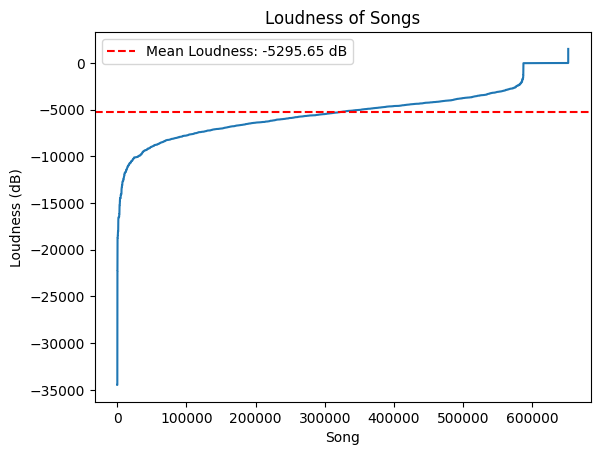

0        -34475.0
1        -34475.0
2        -34475.0
3        -25166.0
4        -25166.0
           ...   
651913     1509.0
651912     1509.0
651934     1509.0
651922     1509.0
651935     1509.0
Name: Loudness, Length: 651936, dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean loudness
mean_loudness = df['Loudness'].mean()
df=df.sort_values(by='Loudness').reset_index()
# Create a bar plot
plt.plot(df['Loudness'])

# Add a horizontal line for the mean loudness
plt.axhline(y=mean_loudness, color='r', linestyle='--', label=f'Mean Loudness: {mean_loudness:.2f} dB')

# Labels and Title
plt.xlabel('Song')
plt.ylabel('Loudness (dB)')
plt.title('Loudness of Songs')
plt.legend()

# Show plot
plt.show()

df['Loudness'].sort_values()

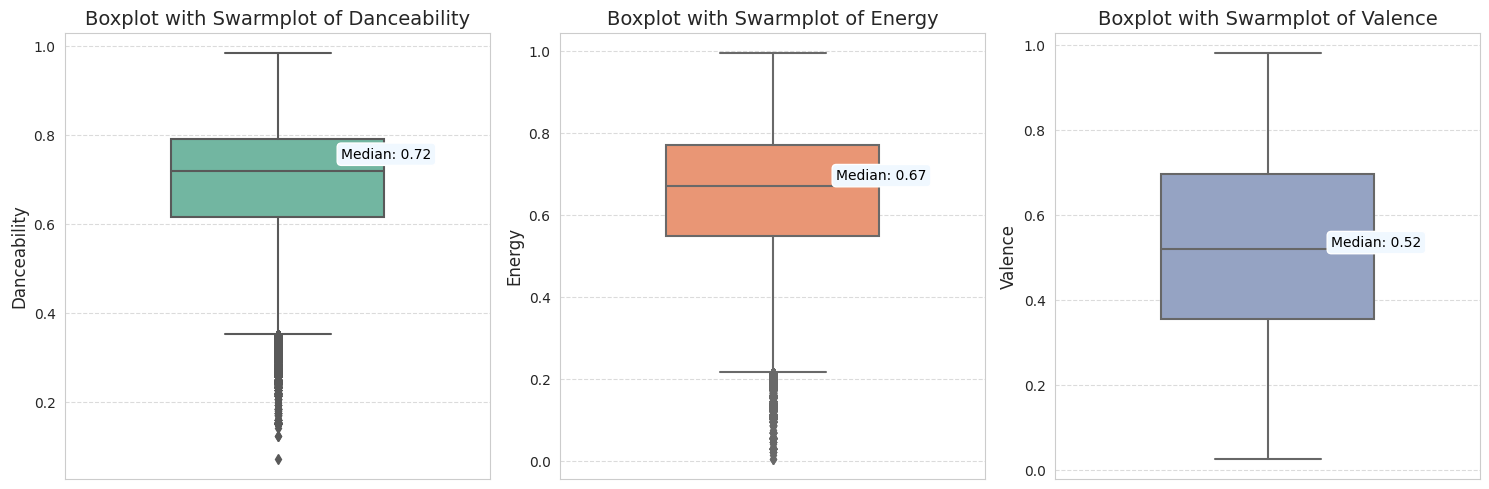

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure object and an array of axes objects

columns_to_plot = ['Danceability', 'Energy', 'Valence']  # replace with your actual column names

colors = sns.color_palette("Set2")

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate through columns, axes, and colors
for col, ax, color in zip(columns_to_plot, axs, colors):
    sns.boxplot(y=df[col], ax=ax, color=color, width=0.5)
    ax.set_title(f'Boxplot with Swarmplot of {col}', fontsize=14)
    ax.set_ylabel(f'{col}', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add Annotations
    median = df[col].median()
    ax.annotate(f'Median: {median:.2f}', xy=(0.65, median),
                xycoords='axes fraction', fontsize=10, color='black',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="aliceblue"))

plt.tight_layout()
plt.show()


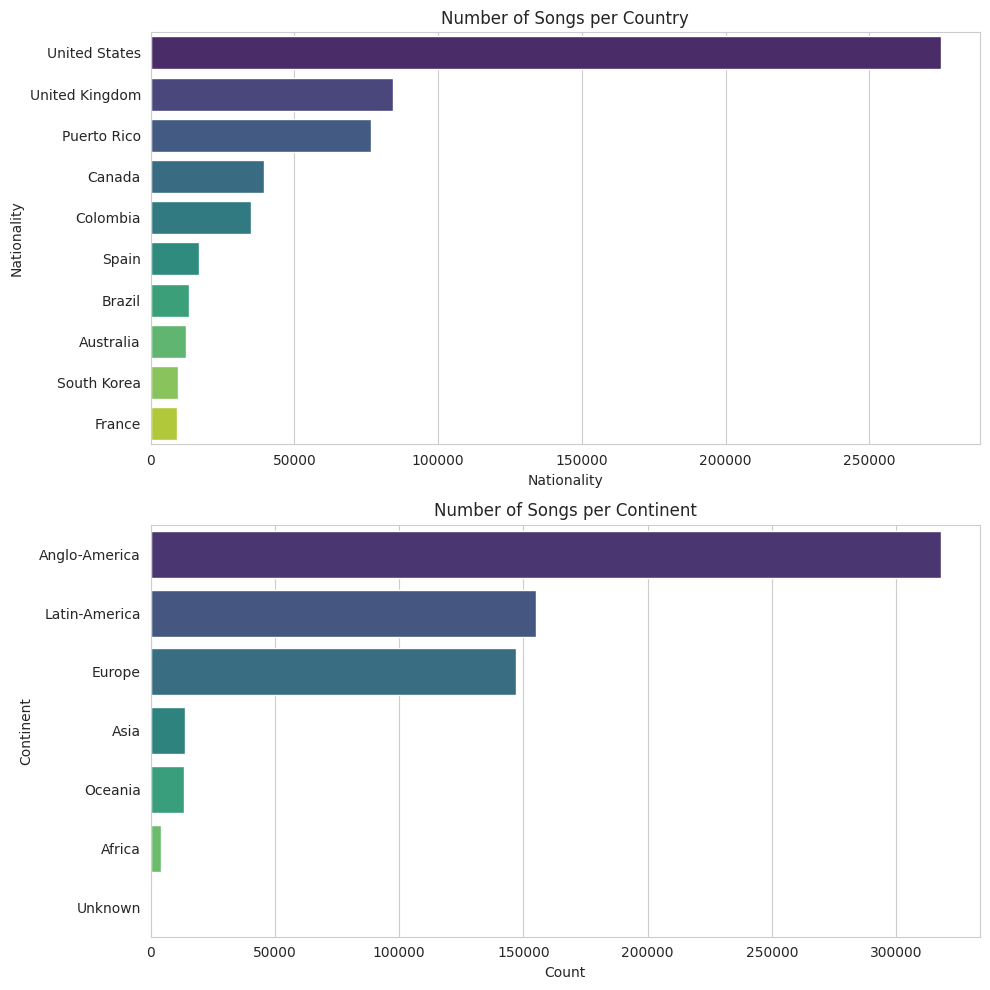

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.countplot(y='Nationality', data=df, ax=axs[0], palette='viridis', order=df['Nationality'].value_counts().nlargest(10).index)
axs[0].set_title('Number of Songs per Country')
axs[0].set_xlabel('Nationality')
axs[0].set_ylabel('Nationality')

# Plot Songs per Continent
sns.countplot(y='Continent', data=df, ax=axs[1], palette='viridis', order=df['Continent'].value_counts().index)
axs[1].set_title('Number of Songs per Continent')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Continent')

plt.tight_layout()
plt.show()

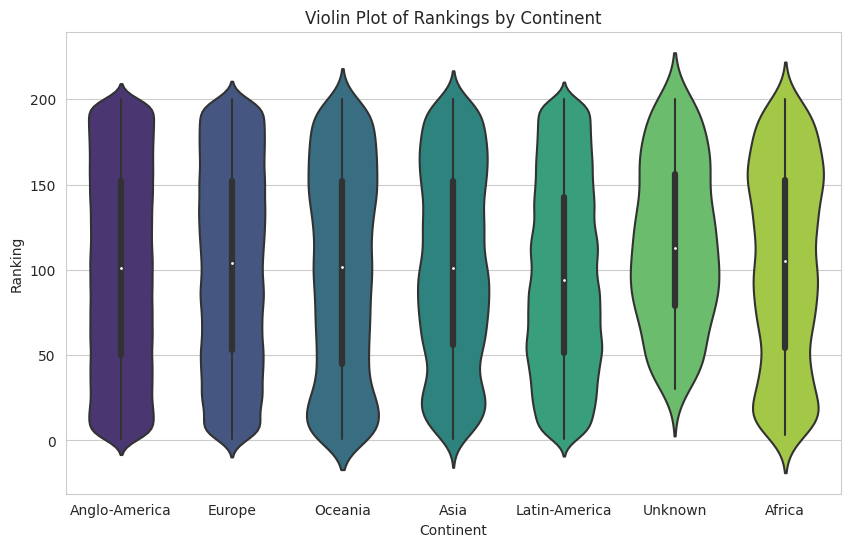

In [ ]:
# Creating a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Continent', y='Rank', data=df, palette='viridis')
plt.title('Violin Plot of Rankings by Continent')
plt.xlabel('Continent')
plt.ylabel('Ranking')
plt.show()

In [ ]:
df = df.rename(columns={"Artist (Ind.)":"indiv_artist"})
grouped=df.groupby('indiv_artist')
aggregated_data = grouped.agg({
    'Rank': 'mean',
    'Date': 'nunique',
    'Danceability': 'mean',
    'Energy': 'mean',
    'Loudness': 'mean',
    'Speechiness': 'mean',
    'Acousticness': 'mean',
    'Instrumentalness': 'mean',
    'Valence': 'mean',
    'Nationality': 'first',
    'Continent': 'first'
}).reset_index()

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()
aggregated_data.columns = ['Artist', 'Avg_Rank', 'days',
                           'Danceability', 'Energy', 'Loudness', 'Speechiness',
                           'Acousticness', 'Instrumentalness', 'Valence', 'Nationality', 'Continent']

numerical_cols = ['Avg_Rank', 'Danceability', 'Energy', 'Loudness',
                  'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
aggregated_data[numerical_cols] = scaler.fit_transform(aggregated_data[numerical_cols])
aggregated_data.head(5)

,Artist,Avg_Rank,days,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Nationality,Continent
0,$NOT,0.489178,93,-0.054169,0.376187,-0.585402,1.073862,-0.662526,-0.174877,-0.282930,United States,Anglo-America
1,$uicideboy$,0.042326,50,0.770925,-0.927996,-0.428915,-0.768835,-0.558746,-0.175914,-2.065084,United States,Anglo-America
2,(G)I-DLE,-0.003830,113,0.018072,1.097932,0.738080,-0.285066,-1.010236,-0.175914,-0.134668,South Korea,Asia
3,*NSYNC,-0.174732,29,-0.290420,1.727382,0.545941,-0.716897,-0.651681,-0.175914,0.993791,United States,Anglo-America
4,070 Shake,-2.064258,186,-1.233596,0.542455,0.104354,0.147295,-0.550217,-0.175914,-1.265124,United States,Anglo-America


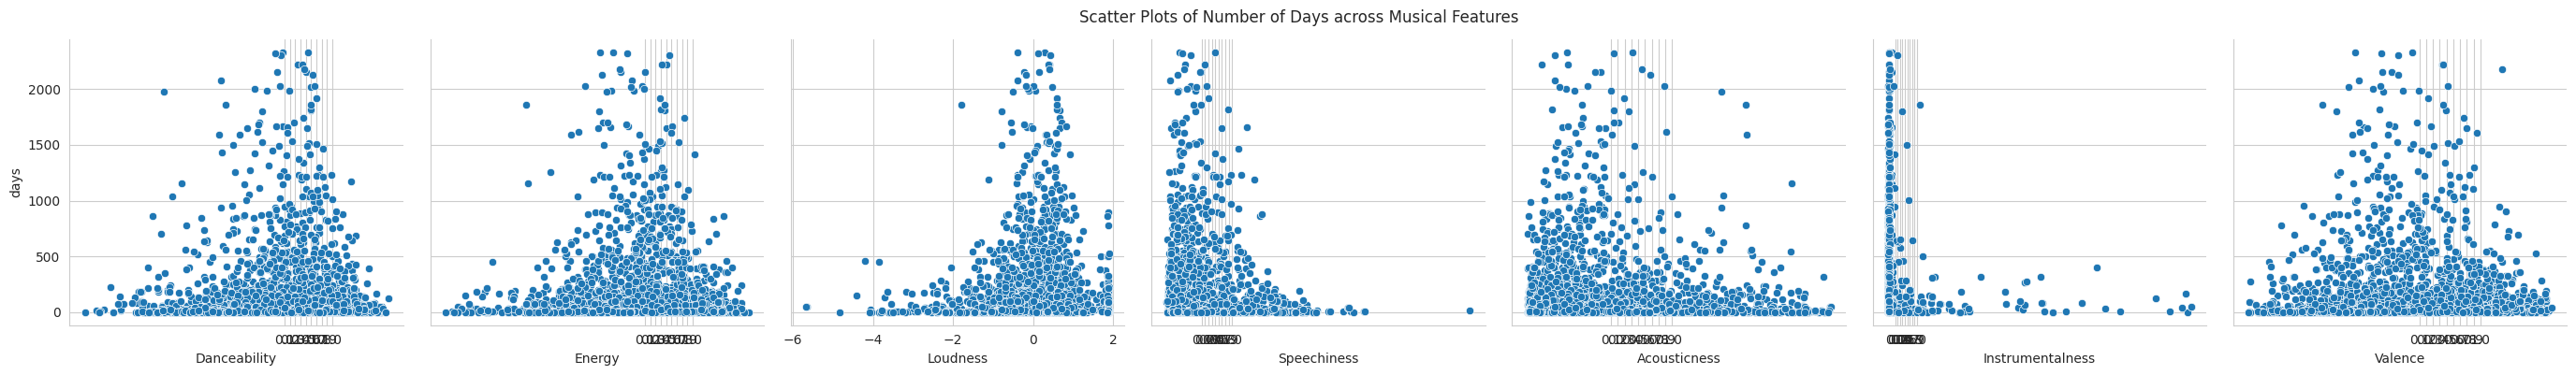

In [ ]:
import numpy as np
musical_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
melted_data = pd.melt(aggregated_data, id_vars=['days'], value_vars=musical_features)
# Create a FacetGrid object
def add_jitter(series, scale_factor=0.01):
    jitter = np.random.randn(len(series)) * scale_factor
    return series + jitter


# Apply jitter to the DataFrame
for feature in musical_features:
    aggregated_data[feature] = add_jitter(aggregated_data[feature])

# Create a PairGrid object
g = sns.PairGrid(aggregated_data, y_vars=['days'], x_vars=musical_features, height=4, aspect=1)
g.map(sns.scatterplot)

# Adjust x-axis ticks
for ax, feature in zip(g.axes.flat, musical_features):
    if feature in ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']:
        ax.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Adjust the arrangement of the plots
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of Number of Days across Musical Features')
plt.show()

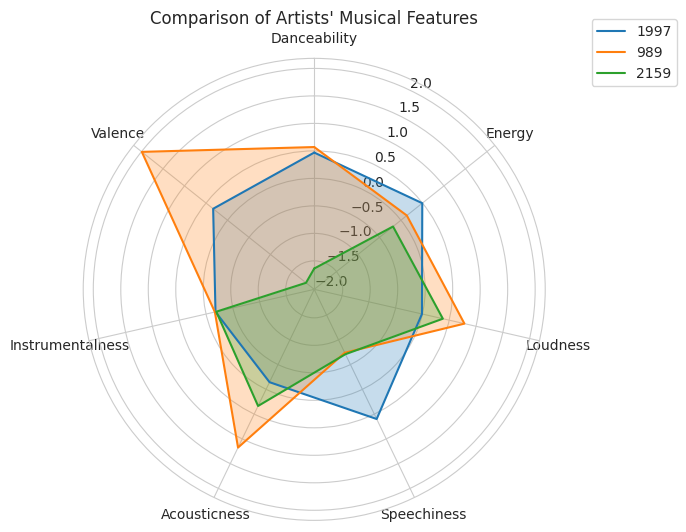

In [ ]:
import random

# For illustration, let's select the first 3 artists.
random.seed(42)


# Select three random artists
random_artists = aggregated_data.drop(columns=["Continent", "Nationality","Avg_Rank", "days", "Artist"]).sample(n=3)


labels = random_artists.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot go round:
angles += angles[:1]
sample = pd.concat([random_artists, random_artists.iloc[:, 0]], axis=1)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for artist, row in sample.iterrows():
    values = row.tolist()
    ax.plot(angles, values, label=artist)
    ax.fill(angles, values, alpha=0.25)

# Improve visualization:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(180 / num_vars)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Comparison of Artists' Musical Features")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

We will have to convert "Date" column to datetime type

In [ ]:
df["Date"] = pd.to_datetime(df.Date, format="%d/%m/%Y", errors='coerce')

Let us drop the song url because it does not give us any additional information

In [ ]:
df = df.drop(["Song URL"], axis=1)

In [ ]:
df[df["Date"].dt.year == 2017]

,index,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,indiv_artist,# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id
0,590419,176,The Explation,XXXTENTACION,2017-08-26,0.597,0.113,-34475.00,0.954,0.461,0.000,0.313,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,25,25.0,0VJYhKhrHgJ7fgjGaC2k07
1,590677,140,The Explation,XXXTENTACION,2017-08-25,0.597,0.113,-34475.00,0.954,0.461,0.000,0.313,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,61,61.0,0VJYhKhrHgJ7fgjGaC2k07
55,557290,29,Carol of the Bells,"Mykola Dmytrovych Leontovych, John Williams",2017-12-25,0.418,0.106,-22507.00,0.045,0.994,0.029,0.800,Artist 2,John Williams,Nationality 2,United States,Anglo-America,172,86.0,4tHqQMWSqmL6YjXwsqthDI
56,557289,29,Carol of the Bells,"Mykola Dmytrovych Leontovych, John Williams",2017-12-25,0.418,0.106,-22507.00,0.045,0.994,0.029,0.800,Artist 1,Mykola Dmytrovych Leontovych,Nationality 1,Ukraine,Europe,172,86.0,4tHqQMWSqmL6YjXwsqthDI
58,561822,156,Carol of the Bells,"Mykola Dmytrovych Leontovych, John Williams",2017-12-09,0.418,0.106,-22507.00,0.045,0.994,0.029,0.800,Artist 1,Mykola Dmytrovych Leontovych,Nationality 1,Ukraine,Europe,45,22.0,4tHqQMWSqmL6YjXwsqthDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651815,556096,180,Agora Vai Sentar,MC's Jhowzinho & Kadinho,2017-12-29,0.814,0.653,-0.02,0.036,0.189,0.000,0.706,Artist 1,MC's Jhowzinho & Kadinho,Nationality 1,Brazil,Latin-America,21,21.0,0pDaqgIForVNO4jrtTxcWT
651816,555804,170,Agora Vai Sentar,MC's Jhowzinho & Kadinho,2017-12-30,0.814,0.653,-0.02,0.036,0.189,0.000,0.706,Artist 1,MC's Jhowzinho & Kadinho,Nationality 1,Brazil,Latin-America,31,31.0,0pDaqgIForVNO4jrtTxcWT
651819,556388,191,Agora Vai Sentar,MC's Jhowzinho & Kadinho,2017-12-28,0.814,0.653,-0.02,0.036,0.189,0.000,0.706,Artist 1,MC's Jhowzinho & Kadinho,Nationality 1,Brazil,Latin-America,10,10.0,0pDaqgIForVNO4jrtTxcWT
651820,565659,176,Agora Vai Sentar,MC's Jhowzinho & Kadinho,2017-11-25,0.814,0.653,-0.02,0.036,0.189,0.000,0.706,Artist 1,MC's Jhowzinho & Kadinho,Nationality 1,Brazil,Latin-America,25,25.0,0pDaqgIForVNO4jrtTxcWT


In [ ]:
categorical = list(filter(lambda x: df[x].dtype=='object',df.columns))

def show_stats(dataframe, columns):
    stat = {}
    for col in columns:
        stat[col] =  [dataframe[col].nunique(), dataframe[col].isna().mean()*100, dataframe[col].dtype]
    return pd.DataFrame.from_dict(stat, orient='index', columns=['Unique',  'Missing values in %', 'DType'])
show_stats(df, categorical)

,Unique,Missing values in %,DType
Title,7457,0.0,object
Artists,2928,0.0,object
# of Artist,9,0.0,object
indiv_artist,2208,0.0,object
# of Nationality,9,0.0,object
Nationality,74,0.0,object
Continent,7,0.0,object
id,9161,0.0,object


# Part 2: Regression

Let us see how many unique songs there are

In [ ]:
df.Title.nunique()

7457

In [ ]:
df_song = df.copy()

gap_threshold = 3

df_song.groupby(by="Title", as_index=False).agg({"Date":"nunique"}).sort_values(by = "Date", ascending=False)

df_song = df_song.sort_values(by=["Title","Date"], ascending=True)

# Calculate the date difference within each song group
df_song['date_diff'] = df_song.groupby('Title')['Date'].diff().dt.days

# Identify the start of a new duration (gap > gap_threshold days)
df_song['new_duration_start'] = (df_song['date_diff'] > gap_threshold) | df_song['date_diff'].isna()

# Assign a duration_id to each unique presence in the charts
df_song['duration_id'] = df_song.groupby('Title')['new_duration_start'].cumsum()

# Group by artist and duration_id, calculate min and max dates
song_durations = df_song.groupby(['Title', 'duration_id'])['Date'].agg(['min', 'max'])

# Calculate the duration for each segment
song_durations['duration'] = (song_durations['max'] - song_durations['min']).dt.days + 1

# Check the results
physical_entries = song_durations.loc['Physical']
physical_entries

,min,max,duration
duration_id,,,
1,2020-01-31,2020-09-24,238
2,2020-12-02,2020-12-03,2
3,2020-12-29,2020-12-31,3
4,2021-01-04,2021-01-04,1
5,2021-03-16,2021-03-16,1


In [ ]:
song_duration_first = song_durations.groupby(by="Title").agg({"duration":"first"})

In [ ]:
# # Calculating various metrics based on duration
# song_metrics = song_durations.groupby('Title')['duration'].agg(['mean', 'max', 'sum', 'count'])

# # Renaming columns for clarity
# song_metrics.rename(columns={
#     'mean': 'avg_duration',
#     'max': 'max_duration',
#     'sum': 'total_duration',
#     'count': 'num_entries'
# }, inplace=True)

# # Example: Viewing metrics for "Believer"
# believer_metrics = song_metrics.loc['Believer']
# print(believer_metrics)

df_song = pd.merge(df_song, song_duration_first, on='Title', how='left')



In [ ]:
df_song[df_song.Title == "Physical"]

,index,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,...,# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,date_diff,new_duration_start,duration_id,duration
402729,338416,17,Physical,Dua Lipa,2020-01-31,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,184,184.0,5px6upUHM3fhOP621Edp4V,NaN,True,1,238
402730,338129,18,Physical,Dua Lipa,2020-02-01,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,183,183.0,5px6upUHM3fhOP621Edp4V,1.0,False,1,238
402731,337841,20,Physical,Dua Lipa,2020-02-02,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,181,181.0,5px6upUHM3fhOP621Edp4V,1.0,False,1,238
402732,337557,18,Physical,Dua Lipa,2020-02-03,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,183,183.0,5px6upUHM3fhOP621Edp4V,1.0,False,1,238
402733,337270,18,Physical,Dua Lipa,2020-02-04,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,183,183.0,5px6upUHM3fhOP621Edp4V,1.0,False,1,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402966,249561,198,Physical,Dua Lipa,2020-12-29,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,3,3.0,3AzjcOeAmA57TIOr9zF1ZW,26.0,True,3,238
402967,249305,199,Physical,Dua Lipa,2020-12-30,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,2,2.0,3AzjcOeAmA57TIOr9zF1ZW,1.0,False,3,238
402968,249056,152,Physical,Dua Lipa,2020-12-31,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,49,49.0,3AzjcOeAmA57TIOr9zF1ZW,1.0,False,3,238
402969,248016,198,Physical,Dua Lipa,2021-01-04,0.647,0.844,-3756.0,0.046,0.014,...,Nationality 1,United Kingdom,Europe,3,3.0,3AzjcOeAmA57TIOr9zF1ZW,4.0,True,4,238


Let's get the average ranking for each song, to get an idea of where each placed on average. Also, get the average points scored by a song

In [ ]:
#Start by getting the average song rank
df_song["avg_song_rank"] = df_song.groupby(by="Title")["Rank"].transform("mean")

In [ ]:
#Filter to only keep songs' first appearance date
df_song["first_appearance"] = df_song.groupby("Title")["Date"].transform("first")
df_song = df_song[df_song.Date == df_song.first_appearance]

Add 2 features: number of artists participating in the song and number of different nationalities

In [ ]:
df_song_unique = df_song.drop_duplicates(subset=["Title", "indiv_artist"]).copy()
df_song_unique.loc[:, "Num_artists"] = df_song_unique.groupby("Title")["Artists"].transform("count")
df_song_unique["num_nationalities"] = df_song_unique.groupby("Title")["Nationality"].transform(lambda x: x.nunique())

In [ ]:
df_song_unique["num_nationalities"] = df_song_unique.groupby("Title")["Nationality"].transform(lambda x: x.nunique())

In [ ]:
df_song_unique = df_song_unique.drop(["index", "Rank", "duration_id", "id", "date_diff", "new_duration_start", "Points (Ind for each Artist/Nat)"], axis = 1)

In [ ]:
df_song_unique = df_song_unique.drop_duplicates(subset=["Title"])

In [ ]:
df_song_unique = df_song_unique.drop(["Date", "Artists", "Title", "# of Nationality", "Nationality",
                     "Continent", "Points (Total)", "indiv_artist", "# of Artist"], axis=1)

In [ ]:
df_song_unique

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,duration,avg_song_rank,first_appearance,Num_artists,num_nationalities
0,0.488,0.670,-5759.0,0.027,0.097,0.0,0.484,4,129.250000,2023-03-03,1,1
4,0.725,0.543,-6311.0,0.084,0.030,0.0,0.693,2,104.000000,2019-08-09,1,1
6,0.783,0.522,-6229.0,0.390,0.029,0.0,0.235,1,189.000000,2019-08-23,2,1
8,0.774,0.507,-6952.0,0.065,0.064,0.0,0.508,11,116.166667,2018-03-16,1,1
20,0.813,0.670,-8661.0,0.335,0.200,0.0,0.380,1,76.000000,2020-11-20,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
651806,0.416,0.528,-10348.0,0.291,0.178,0.0,0.203,1,166.000000,2021-04-29,1,1
651807,0.576,0.446,-10103.0,0.044,0.773,0.4,0.060,1,84.000000,2021-04-29,1,1
651808,0.786,0.748,-7568.0,0.162,0.267,0.0,0.562,17,128.437500,2022-04-18,1,1
651824,0.574,0.935,-2783.0,0.093,0.112,0.0,0.836,44,110.477273,2023-04-16,1,1


In [ ]:
df_song_unique.dtypes

Danceability                float64
Energy                      float64
Loudness                    float64
Speechiness                 float64
Acousticness                float64
Instrumentalness            float64
Valence                     float64
duration                      int64
avg_song_rank               float64
first_appearance     datetime64[ns]
Num_artists                   int64
num_nationalities             int64
dtype: object

Let's explore our data to see if any feature engineering is required. All our variables are numerical!

In [ ]:
#Select discrete columns
def discrete(df_num):
  df_num = df_song_unique[["Num_artists", "num_nationalities"]]
  return df_num

#Select continuous columns
df_discrete = discrete(df_song_unique)

def continuous(df_num):
  df_num = df_song_unique.drop(["Num_artists", "num_nationalities"], axis=1)
  return df_num

df_continuous = continuous(df_song_unique)

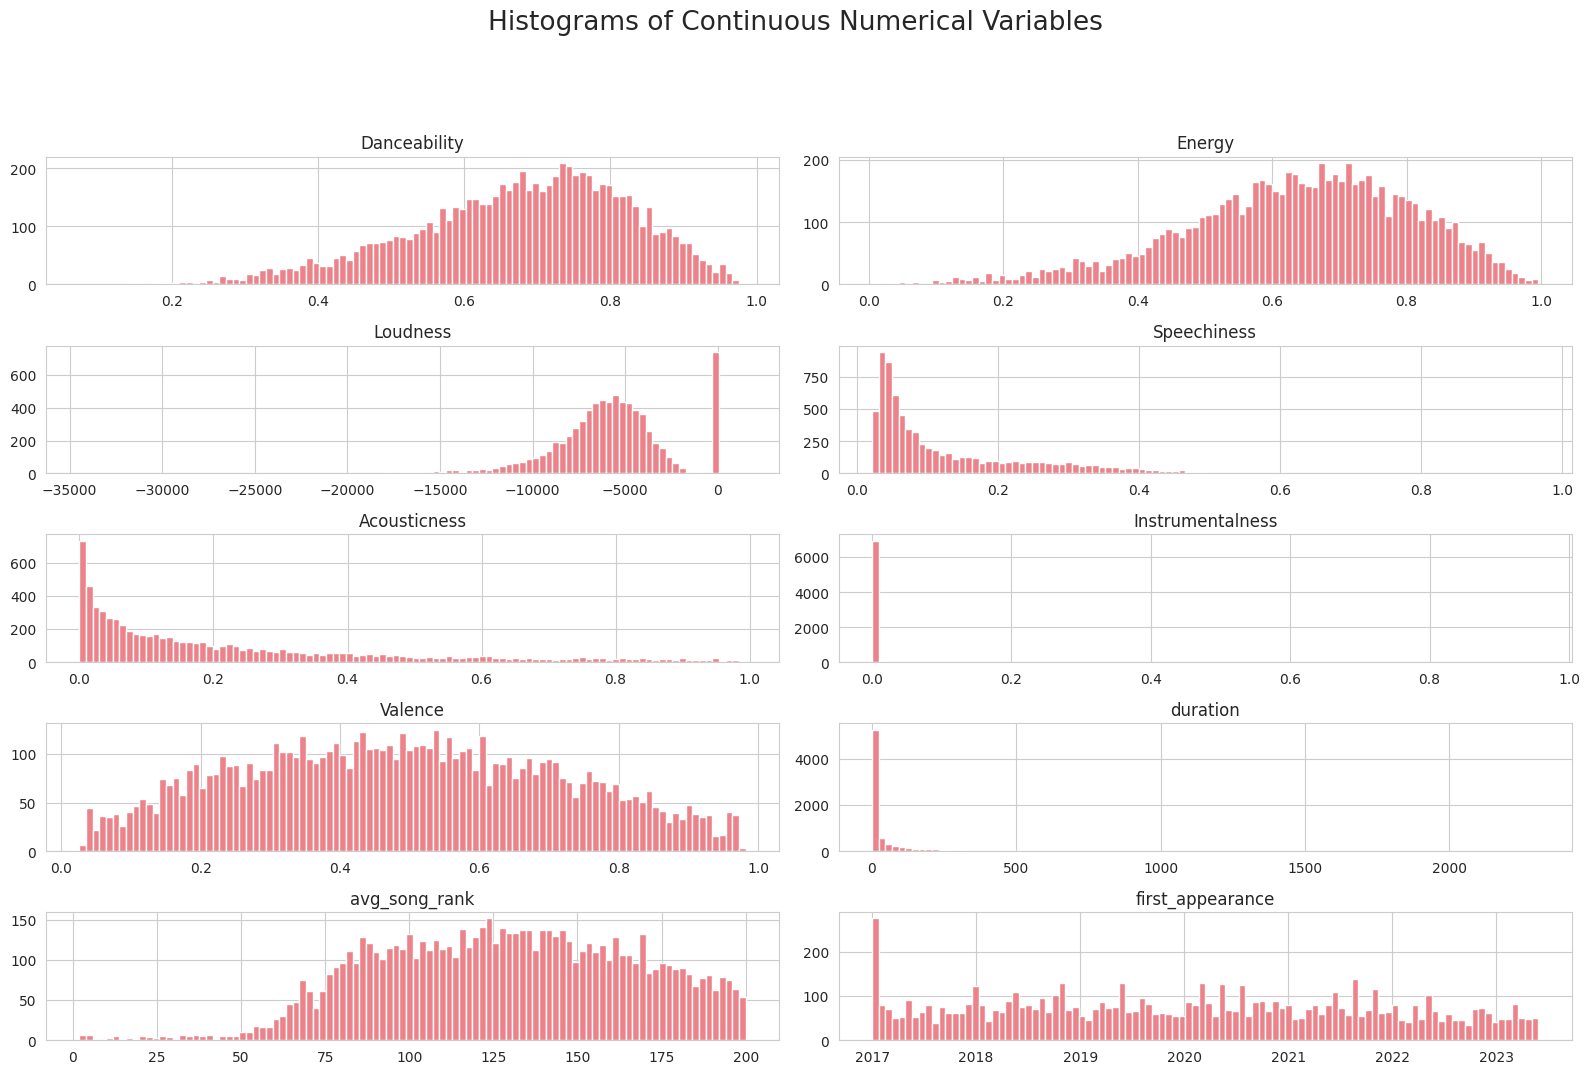

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def histogram_numerical(df_continuous):
    fig = plt.figure(figsize=(16, 13))
    plt.suptitle('Histograms of Continuous Numerical Variables\n', horizontalalignment="center",
                 fontsize=19)
    num_columns = df_continuous.shape[1]
    for i in range(num_columns):
        plt.subplot(6, 2, i+1)
        column_data = df_continuous.iloc[:, i]
        vals = column_data.nunique()
        if vals > 100:
            vals = 100
        plt.hist(column_data, bins=vals, color='#ec838a')
        plt.title(df_continuous.columns[i])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


histogram_numerical(df_continuous)


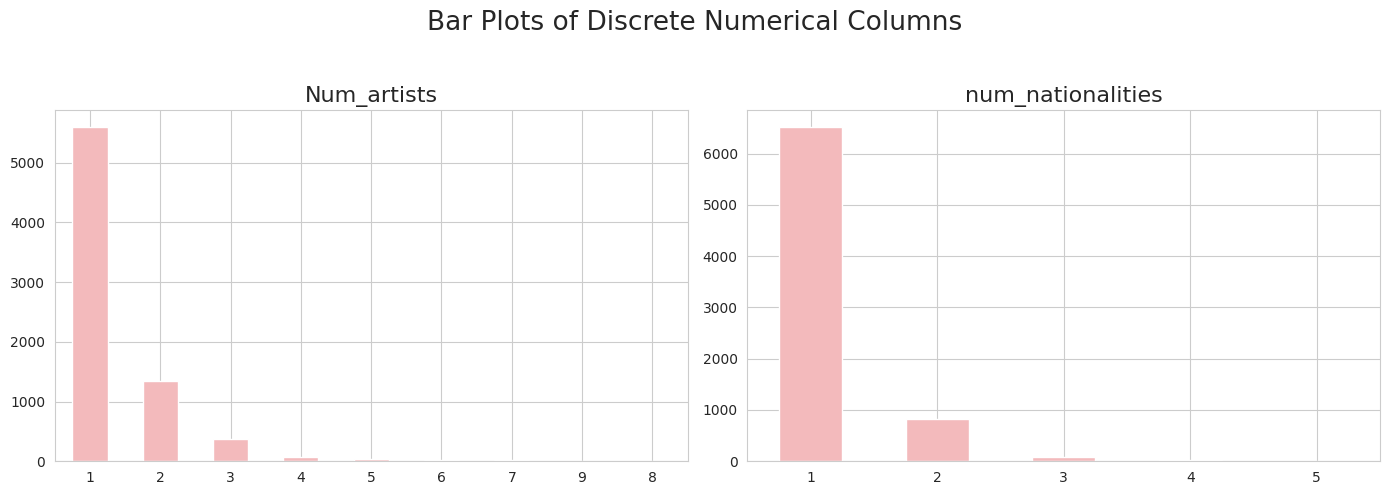

In [ ]:
def barplot_disc(df_discrete):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
  plt.suptitle('Bar Plots of Discrete Numerical Columns\n', horizontalalignment="center",
                fontsize=19)
  for i, item in enumerate(df_discrete):
          ax = df_discrete[item].value_counts().plot(kind='bar', ax=axes[i], rot=0, color='#f3babc')
          ax.set_title(item, fontdict={'fontsize': 16})

  plt.tight_layout()
  plt.show()


barplot_disc(df_discrete)

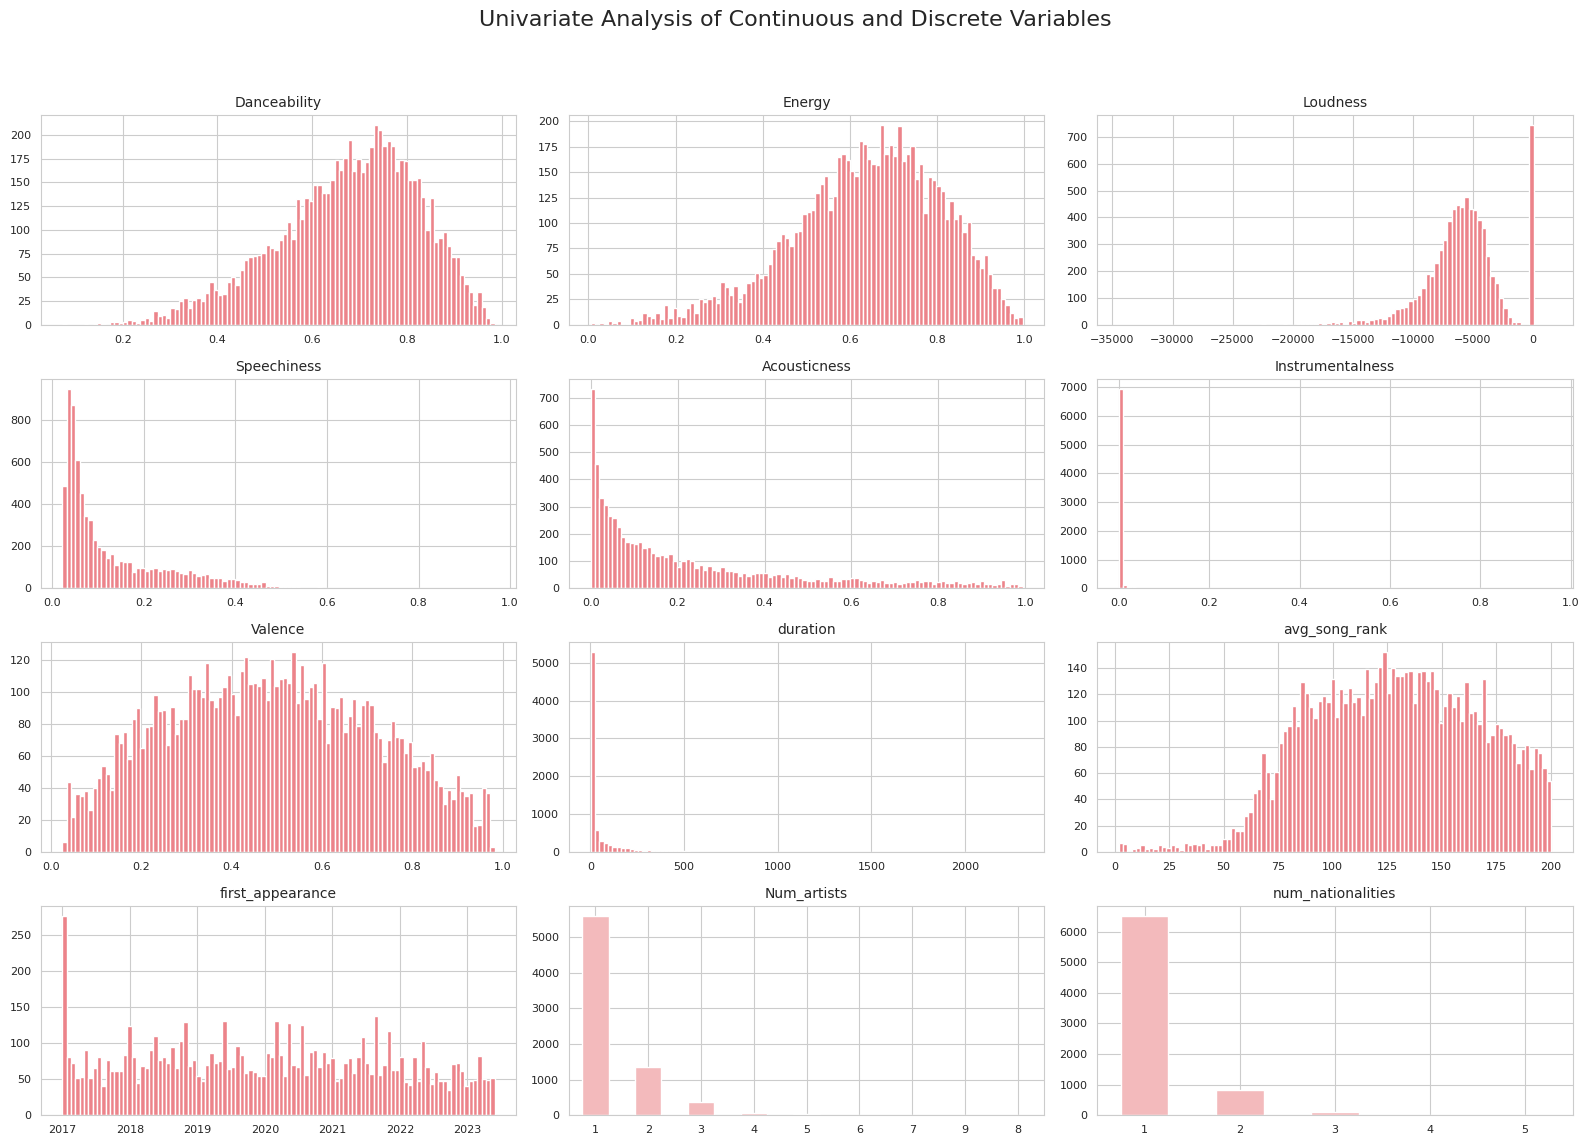

In [ ]:


def combined_univariate_analysis(df_continuous, df_discrete):
    # Calculate the total number of subplots needed
    total_plots = df_continuous.shape[1] + df_discrete.shape[1]

    # Choose a layout that fits the page limit and aspect ratio
    cols = 3  # for example, you might choose 3 or 4 columns based on what fits your page layout best
    rows = int(np.ceil(total_plots / cols))

    # Create a large figure to accommodate all the subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 3))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot histograms for continuous variables
    for i, column in enumerate(df_continuous.columns):
        column_data = df_continuous[column]
        vals = column_data.nunique()
        if vals > 100:
            vals = 100
        axes[i].hist(column_data, bins=vals, color='#ec838a')
        axes[i].set_title(column, fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Plot barplots for discrete variables
    for j, column in enumerate(df_discrete.columns, start=i+1):
        df_discrete[column].value_counts().plot(kind='bar', ax=axes[j], rot=0, color='#f3babc')
        axes[j].set_title(column, fontsize=10)
        axes[j].tick_params(axis='x', labelsize=8)
        axes[j].tick_params(axis='y', labelsize=8)

    # Hide any unused subplots
    for ax in axes[df_continuous.shape[1] + df_discrete.shape[1]:]:
        ax.axis('off')

    plt.suptitle('Univariate Analysis of Continuous and Discrete Variables', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
combined_univariate_analysis(df_continuous, df_discrete)


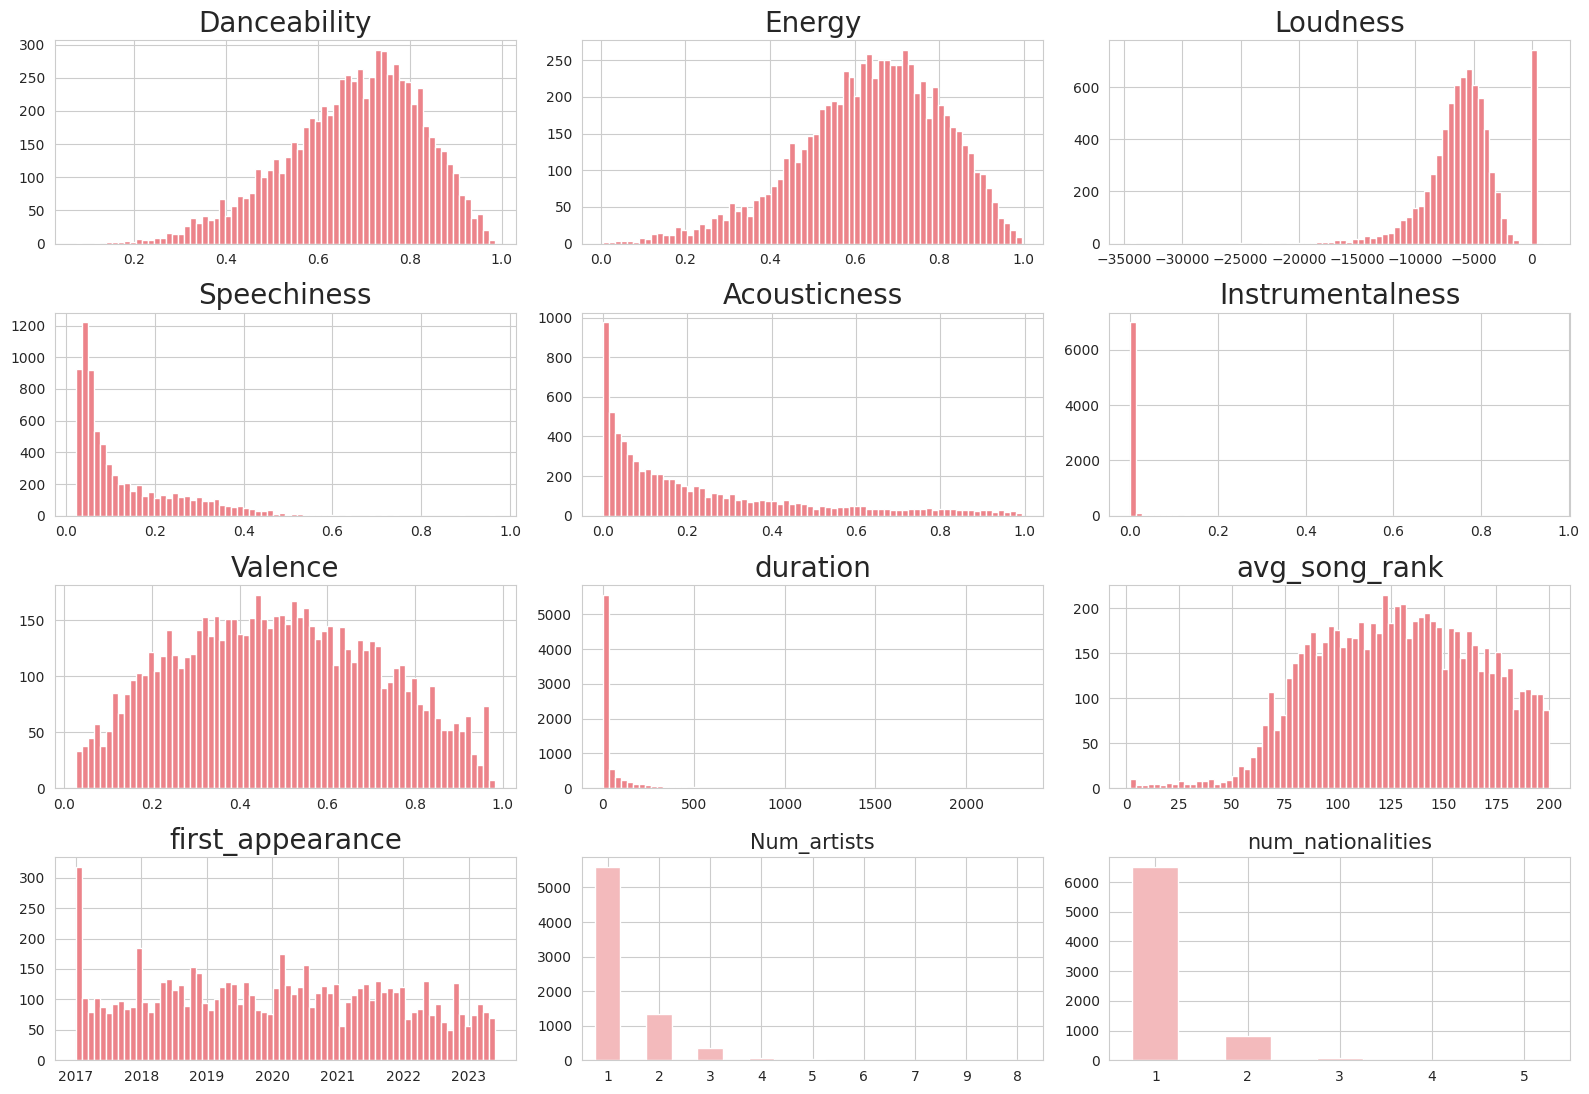

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def combined_univariate_analysis(df_continuous, df_discrete, fixed_bins=None):
    # Calculate the total number of subplots needed
    total_plots = df_continuous.shape[1] + df_discrete.shape[1]

    # Choose a layout that fits the page limit and aspect ratio
    cols = 3  # Adjust columns based on your data
    rows = int(np.ceil(total_plots / cols))

    # Create a large figure to accommodate all the subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, rows * 3))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Plot histograms for continuous variables
    for i, column in enumerate(df_continuous.columns):
        column_data = df_continuous[column]
        # Use a fixed number of bins if provided, otherwise calculate it
        bins = fixed_bins if fixed_bins is not None else min(column_data.nunique(), int(np.sqrt(column_data.shape[0])))
        axes[i].hist(column_data, bins=bins, color='#ec838a')
        axes[i].set_title(column, fontsize=20)
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)

    # Plot barplots for discrete variables
    for j, column in enumerate(df_discrete.columns, start=i+1):
        df_discrete[column].value_counts().plot(kind='bar', ax=axes[j], rot=0, color='#f3babc')
        axes[j].set_title(column, fontsize=15)
        axes[j].tick_params(axis='x', labelsize=10)
        axes[j].tick_params(axis='y', labelsize=10)

    # Hide any unused subplots
    for ax in axes[df_continuous.shape[1] + df_discrete.shape[1]:]:
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage:
# You can adjust the 'fixed_bins' parameter to find the appropriate thickness
combined_univariate_analysis(df_continuous, df_discrete, fixed_bins=70)


Let us get rid of the outliers using the IQR method

In [ ]:
# Save the column 'first_appearance' in a separate variable
first_appearance_col = df_song_unique["first_appearance"].copy()
num_artists_col = df_song_unique["Num_artists"].copy()
num_nationalities_col = df_song_unique["num_nationalities"].copy()

# Drop the column 'first_appearance' and discrete cols from the main dataframe
df_temp = df_song_unique.drop(["first_appearance", "Num_artists", "num_nationalities"], axis=1)

# Calculate the IQR for each numerical column
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (df_temp < (Q1 - 1.5 * IQR)) | (df_temp > (Q3 + 1.5 * IQR))

# Remove outliers from the original dataset
df_cleaned = df_temp[~outliers.any(axis=1)].copy()

# Add the 'first_appearance' column back to the cleaned dataframe
df_cleaned.loc[:, "first_appearance"] = first_appearance_col.loc[df_cleaned.index]
df_cleaned.loc[:, "Num_artists"] = num_artists_col.loc[df_cleaned.index]
df_cleaned.loc[:, "num_nationalities"] = num_nationalities_col.loc[df_cleaned.index]


Let's draw the plots again to see if they are better

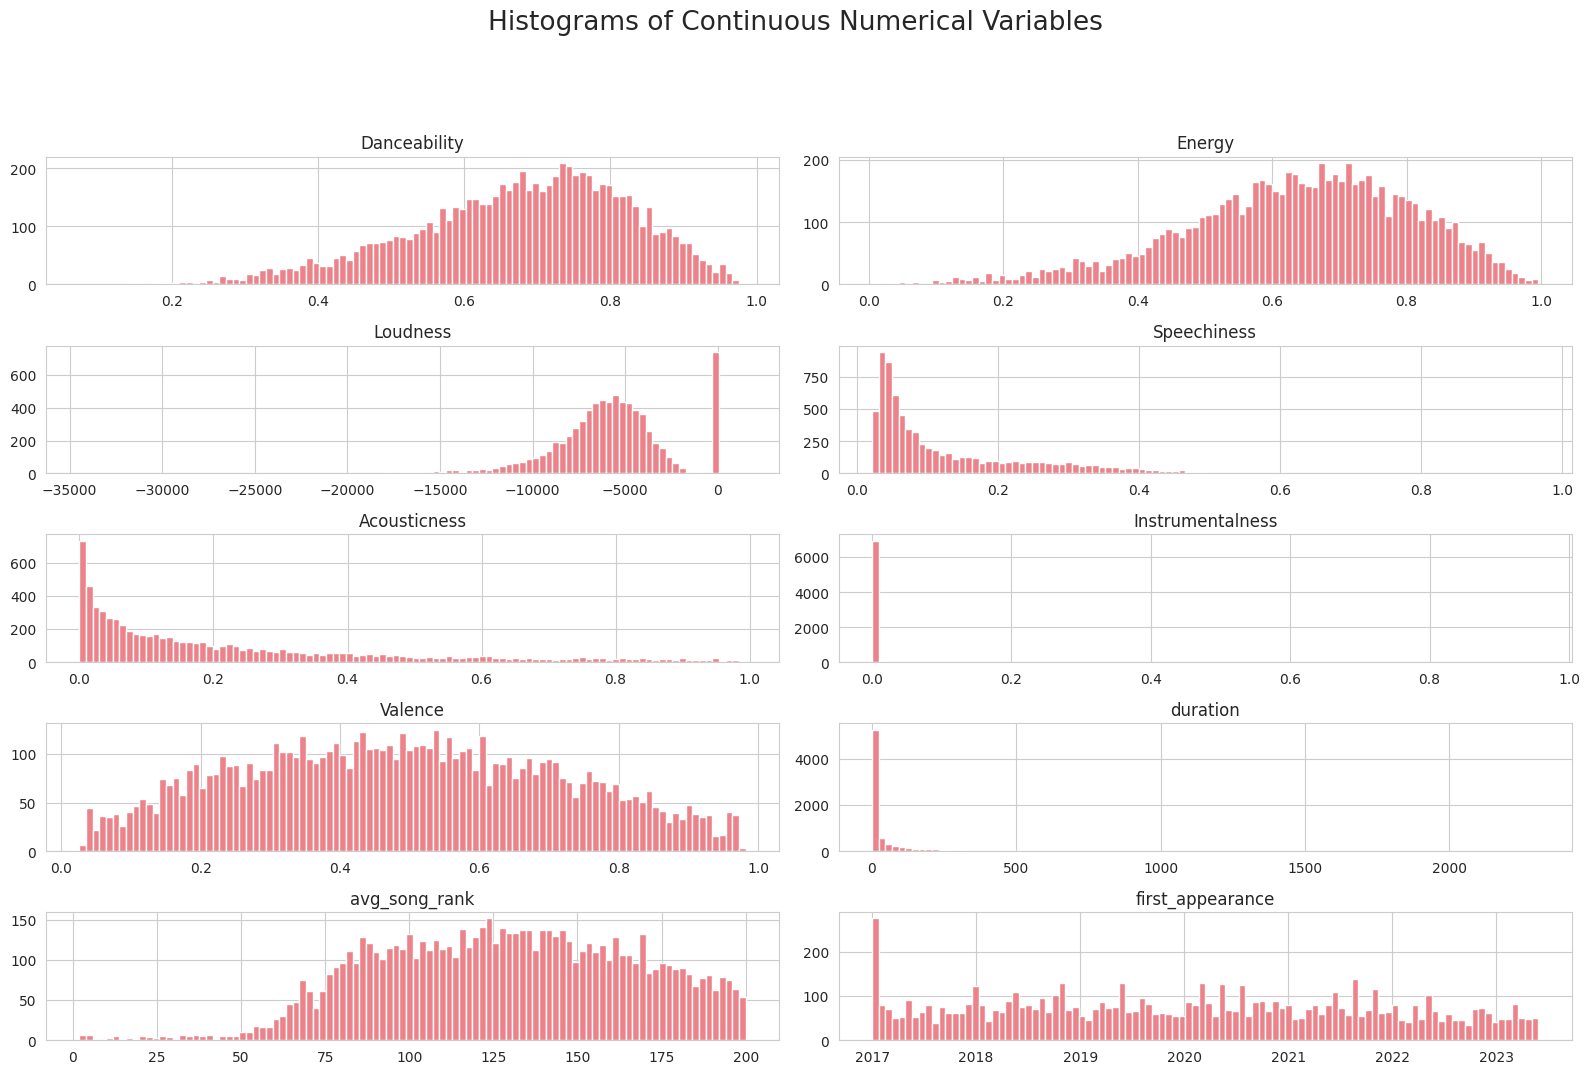

In [ ]:
#Redefining discrete and continuous variables to reflect updates
df_discrete = discrete(df_cleaned)
df_continuous = continuous(df_cleaned)

histogram_numerical(df_continuous)

In [ ]:
import numpy as np

#Fix skewness of target variable to make it Gaussian (linear reg assumption)
df_cleaned.loc[:,"duration"] = df_cleaned.duration.apply(lambda x:np.log(x))

We notice that instrumentalness is full of 0 values, so we remove it since it does not bring any additional info to the table

In [ ]:
df_cleaned = df_cleaned.drop("Instrumentalness", axis = 1)

(array([1680.,  486.,  177.,  410.,  589.,  336.,  306.,  292.,  253.,
         284.]),
 array([0.        , 0.44543473, 0.89086946, 1.33630419, 1.78173892,
        2.22717365, 2.67260838, 3.11804311, 3.56347784, 4.00891257,
        4.4543473 ]),
 <BarContainer object of 10 artists>)

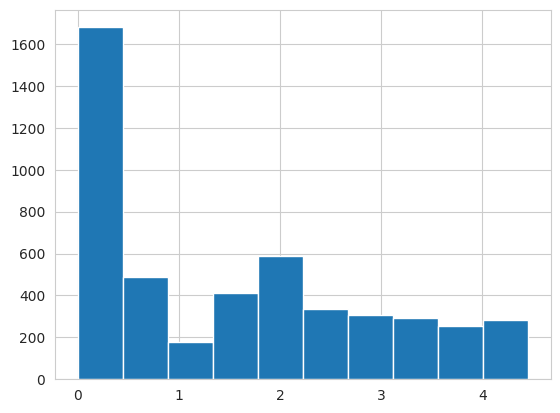

In [ ]:
plt.hist(df_cleaned.duration)

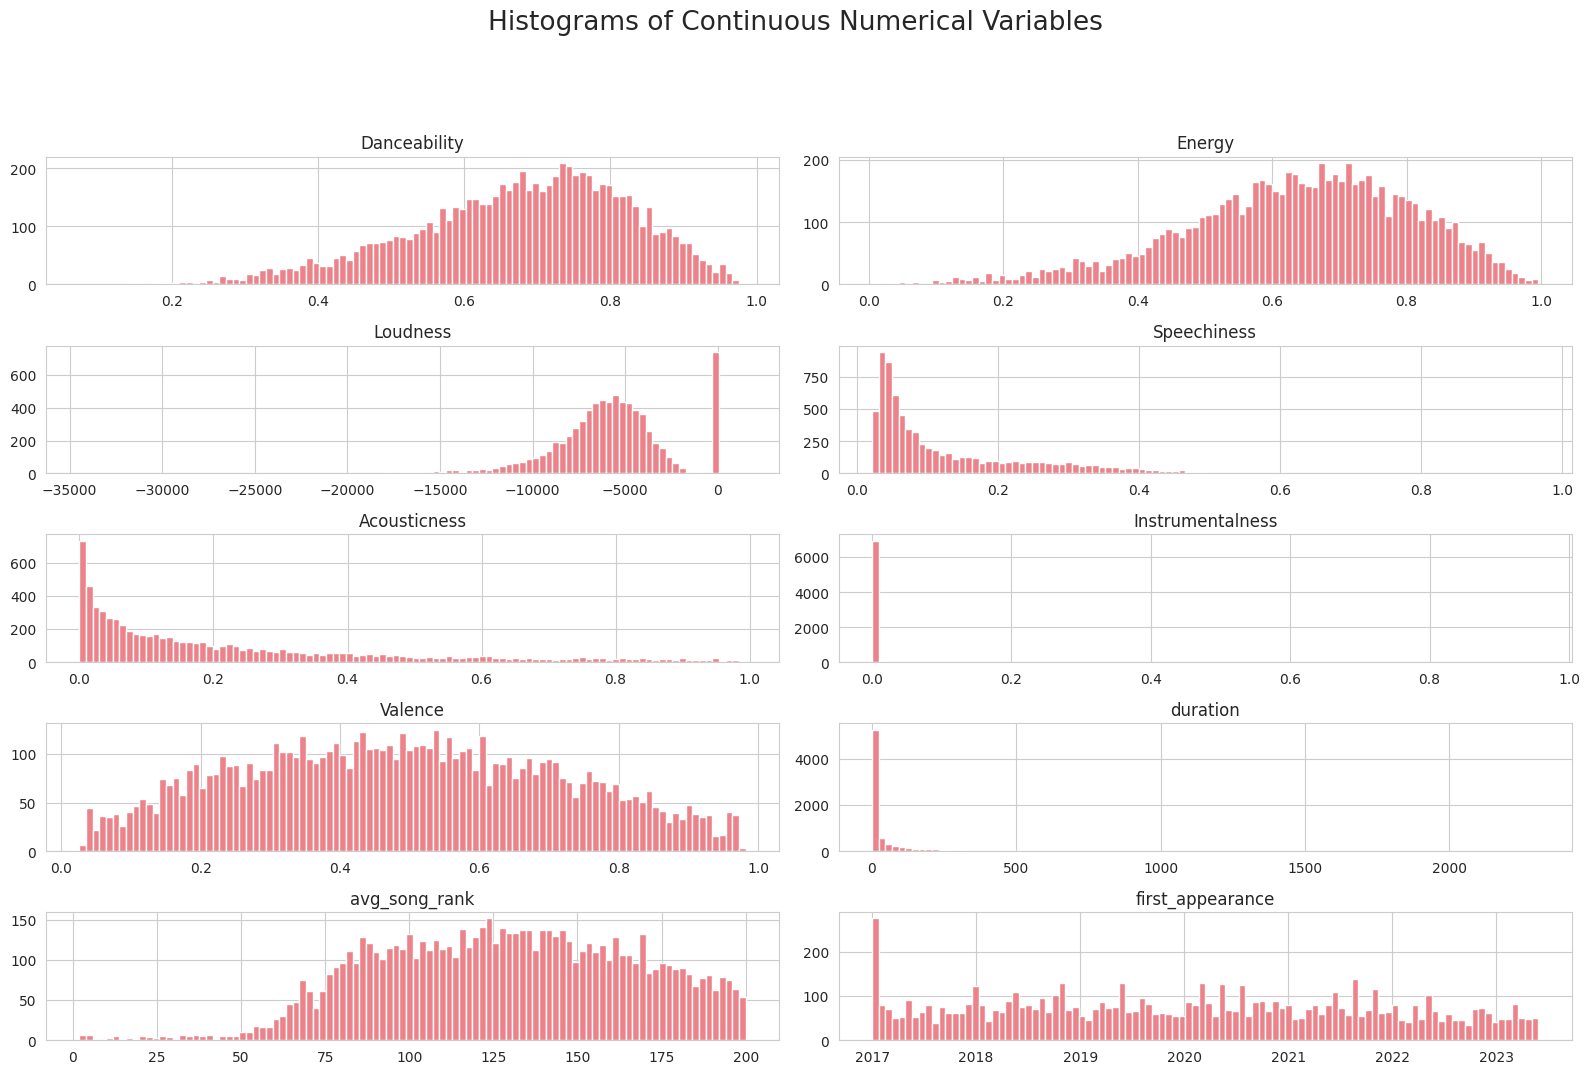

In [ ]:
#Redefining discrete and continuous variables to reflect updates
df_discrete = discrete(df_cleaned)
df_continuous = continuous(df_cleaned)

histogram_numerical(df_continuous)

Bivariate analysis (no scaling)

<ipython-input-41-98ced495bb7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_continuous.corr()


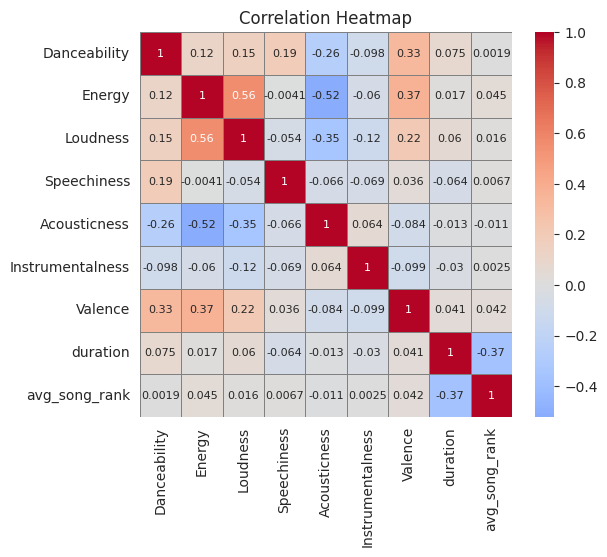

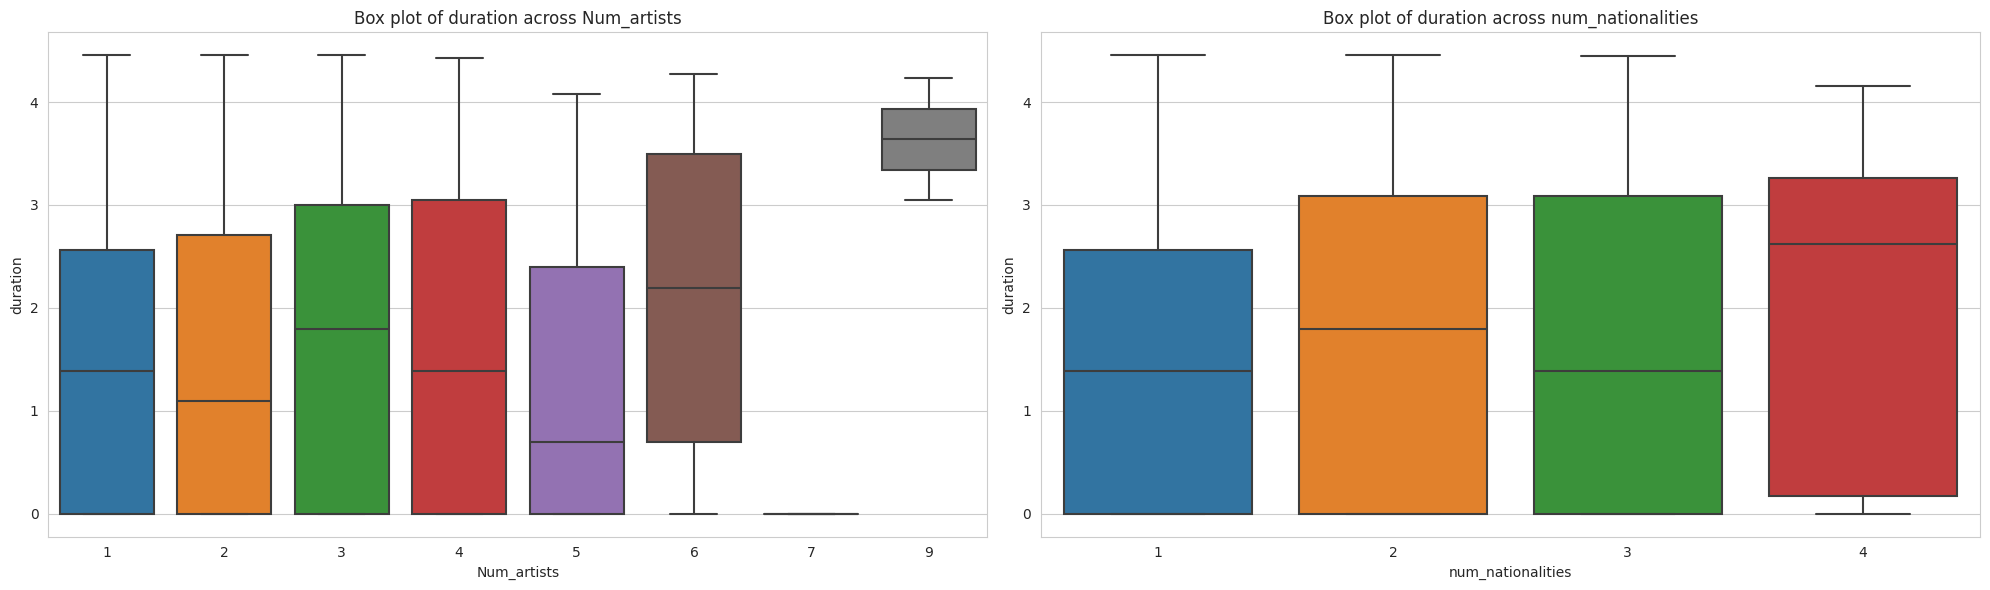

In [ ]:
correlation_matrix = df_continuous.corr()

# Create the correlation heatmap
plt.figure(figsize=(6, 5))  # Increase size a bit
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            annot_kws={"size": 8},  # Reduce font size for annotations
            yticklabels=True,  # Ensure y-axis labels are shown
            linewidths=.5,  # Set linewidth
            linecolor='gray')  # Set line color
plt.title("Correlation Heatmap")
plt.yticks(rotation=0)  # Ensure y-labels are horizontal
plt.show()



# Set up a subplot grid with 1 row and 2 columns (for 2 plots)
plt.figure(figsize=(20, 6))


# List of discrete columns
discrete_cols = df_discrete.columns.tolist()

# Loop over discrete columns and create box plots
for idx, col in enumerate(discrete_cols, 1):
    plt.subplot(1, 2, idx)
    sns.boxplot(x=col, y='duration', data=df_cleaned)
    plt.title(f"Box plot of duration across {col}")

plt.tight_layout()
plt.show()


<ipython-input-42-0fe179fc8e01>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_continuous.corr().round(2)


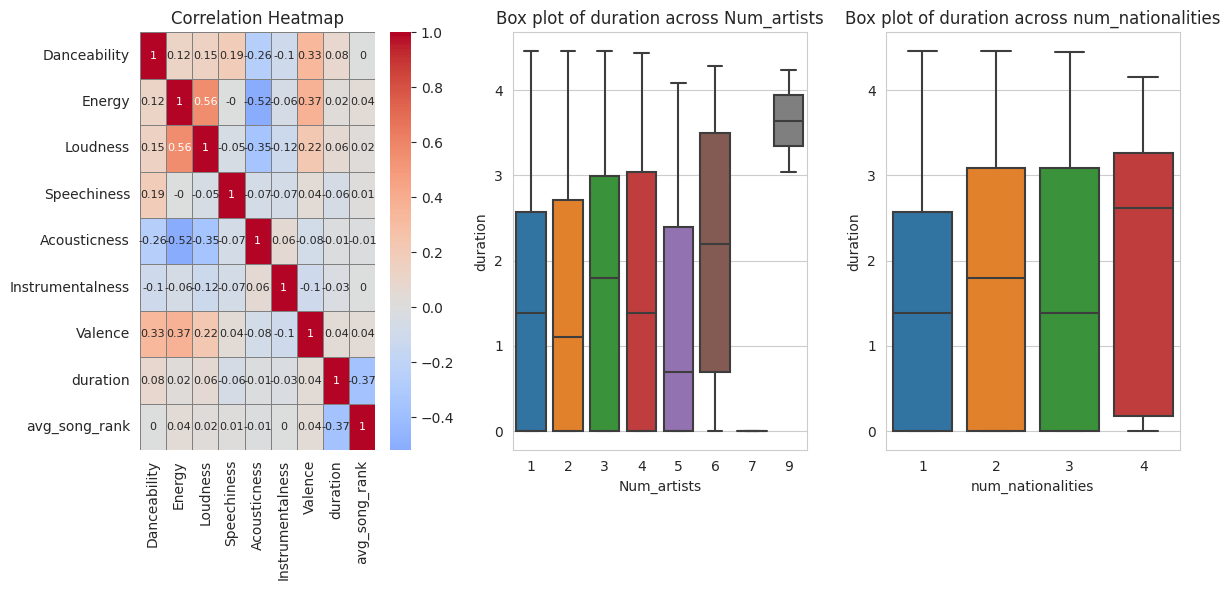

In [ ]:


# First part: Correlation Heatmap
correlation_matrix = df_continuous.corr().round(2)


# Set up a figure to contain both plots
fig = plt.figure(figsize=(12, 6))  # Adjust overall size to fit into 6 pages

# Add first subplot for the heatmap
ax1 = fig.add_subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            annot_kws={"size": 8},  # Reduce font size for annotations
            linewidths=.5, linecolor='gray', ax=ax1)
ax1.set_title("Correlation Heatmap")
ax1.tick_params(axis='y', rotation=0)

# Add second and third subplots for the box plots
for idx, col in enumerate(discrete_cols, 2):  # Start from the second plot position
    ax = fig.add_subplot(1, 3, idx)
    sns.boxplot(x=col, y='duration', data=df_cleaned, ax=ax)
    ax.set_title(f"Box plot of duration across {col}")

plt.tight_layout()  # Ensure the layout is tight to reduce white space
plt.show()


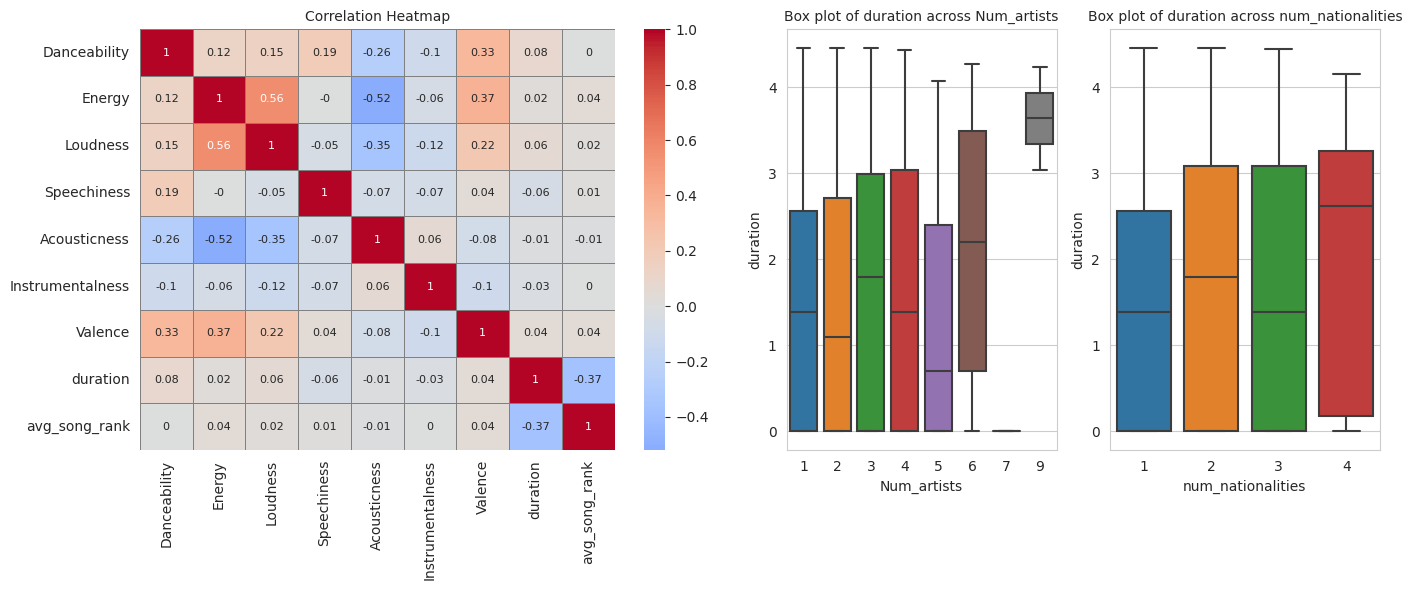

In [ ]:
# Adjust the figure size and layout to give more space to the heatmap
fig = plt.figure(figsize=(14, 6))  # Increase width to give more space to the heatmap

# Add first subplot for the heatmap with more space
ax1 = fig.add_subplot(1, 4, (1, 2))  # 1 row, 4 columns, span first two columns for the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            annot_kws={"size": 8},  # Keep font size for annotations small
            linewidths=.5, linecolor='gray', ax=ax1)
ax1.set_title("Correlation Heatmap", fontsize=10)
ax1.tick_params(axis='y', rotation=0)

# Add subplots for the box plots in the remaining space
for idx, col in enumerate(discrete_cols, 3):  # Start from the third plot position
    ax = fig.add_subplot(1, 4, idx)
    sns.boxplot(x=col, y='duration', data=df_cleaned, ax=ax)
    ax.set_title(f"Box plot of duration across {col}", fontsize=10)

plt.tight_layout()  # Ensure the layout is tight to reduce white space
plt.show()


Now we split our data into train and test sets, by making sure that later dates are not part of the train sets.

In [ ]:
# #Sort by ascending order depending on the date the song appeared in the charts
# df_cleaned = df_cleaned.sort_values("first_appearance", ascending = True)

# train_size = int(0.8 * len(df_cleaned))
# train_df = df_cleaned.iloc[:train_size]
# test_df = df_cleaned.iloc[train_size:]

# #Date column is no longer of use, so we can drop it
# train_df = train_df.drop("first_appearance", axis=1)
# test_df = test_df.drop("first_appearance", axis=1)

In [ ]:
# Define the split sizes
train_size = int(0.7 * len(df_cleaned))
val_size = int(0.15 * len(df_cleaned))

# Split the data into train, validation, and test sets
train_df = df_cleaned.iloc[:train_size]
val_df = df_cleaned.iloc[train_size:train_size + val_size]
test_df = df_cleaned.iloc[train_size + val_size:]

# Drop the 'first_appearance' column from each set
train_df = train_df.drop("first_appearance", axis=1)
val_df = val_df.drop("first_appearance", axis=1)
test_df = test_df.drop("first_appearance", axis=1)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Defining X and y for training data
# X_train = train_df.drop(columns=["duration"])
# y_train = train_df["duration"]

# # Defining X and y for test data
# X_test = test_df.drop(columns=["duration"])
# y_test = test_df["duration"]

# #Initialise the scaler
# scaler = StandardScaler()

# #Fit scaler on training data and transform
# X_train_scaled = scaler.fit_transform(X_train)

# #transform test data
# X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Defining X and y for training data
X_train = train_df.drop(columns=["duration"])
y_train = train_df["duration"]

# Defining X and y for validation data
X_val = val_df.drop(columns=["duration"])
y_val = val_df["duration"]

# Defining X and y for test data
X_test = test_df.drop(columns=["duration"])
y_test = test_df["duration"]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data
X_val_scaled = scaler.transform(X_val)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


Bivariate Analysis

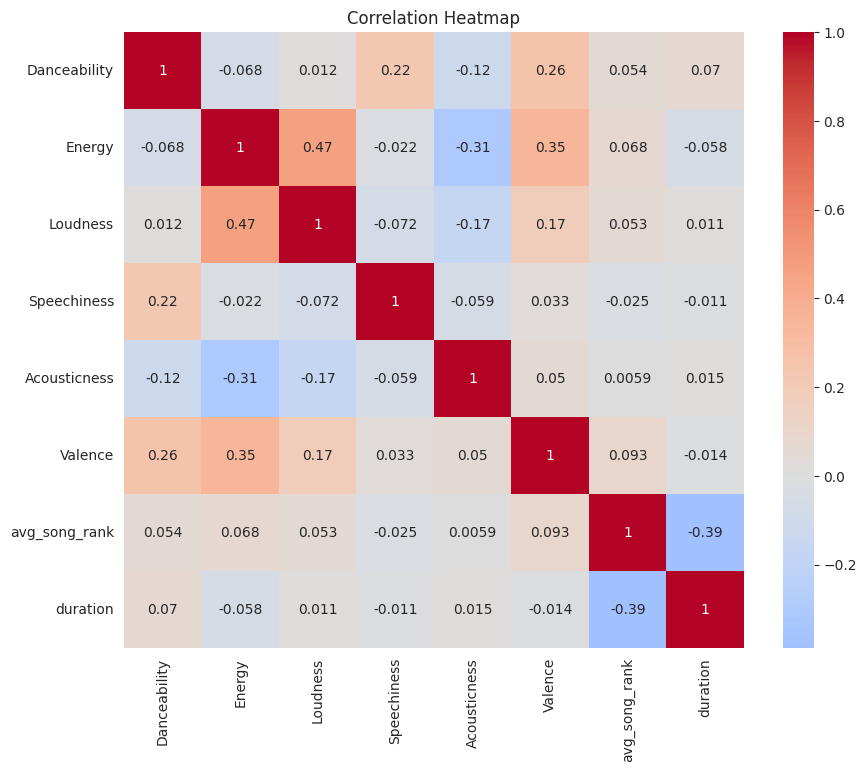

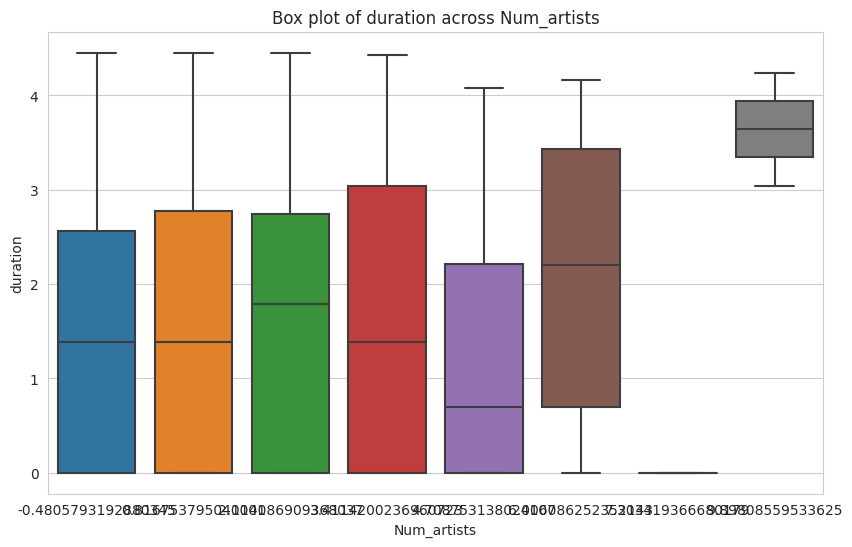

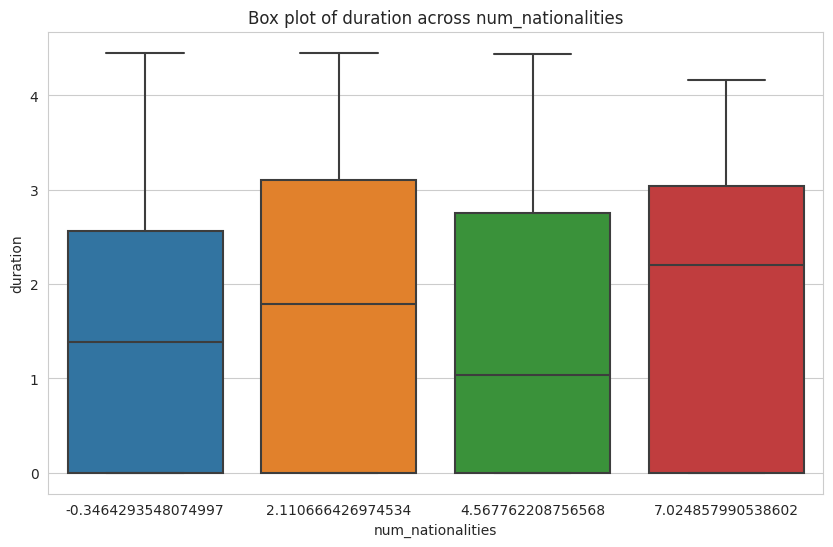

In [ ]:
# Convert the scaled X_train (numpy array) to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Combine the scaled X_train with y_train
combined_data = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)

# Specify the discrete columns
discrete_cols = ['Num_artists', 'num_nationalities']

# Exclude discrete columns when computing the correlation matrix
continuous_cols = [col for col in combined_data.columns if col not in discrete_cols]
correlation_matrix = combined_data[continuous_cols].corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# Create box plots for the discrete columns against duration
for col in discrete_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='duration', data=combined_data)
    plt.title(f"Box plot of duration across {col}")
    plt.show()


Let us see if our data meets all the assumptions of linear regression:

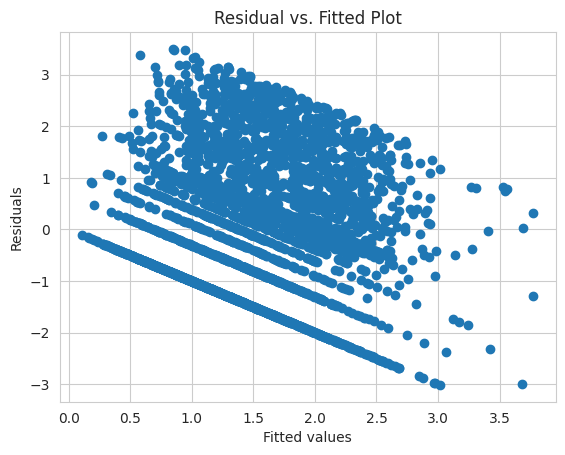

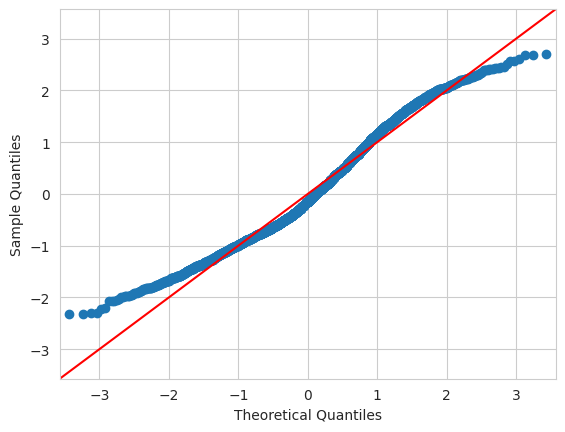

   VIF Factor           features
0    1.227524       Danceability
1    1.659045             Energy
2    1.293483           Loudness
3    1.063948        Speechiness
4    1.204502       Acousticness
5    1.335915            Valence
6    1.016129      avg_song_rank
7    1.566827        Num_artists
8    1.553112  num_nationalities


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Fit the regression model
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()

# Residual vs. Fitted plot
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

# Q-Q plot for normality
fig = sm.qqplot(model.resid, line='45', fit=True)
plt.show()

# Calculate and view VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
vif["features"] = X_train.columns
print(vif)


All assumptions of linear regression seem to be satisfied:


1.   **Linearity between independent and dependent variables** shown through the fact that points are randomly spread in the residuals vs fitted plot, suggesting no clear pattern.
2.   **Normality of residuals:** most points on QQ plot follow the diagonal line.
3.   **Homoscedasticity:** Satisfied because in residual vs fitted plot, the spread of residuals does seems to be constant across the fitted values, with just a little bit of heteroscedasticity that is not concerning.
4.   **No multicollinearity:** VIF factor shows that there is a very weak correlation between the independent variables with themselves, which is a good thing.


We can start fitting the models: our tactic is to fit Vanilla models and then optimise the models which perform the best

In [ ]:
model_metrics = pd.DataFrame(columns=["Model", "RMSE", "MAE"])

In [ ]:
# Simple Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump

model = LinearRegression()
model.fit(X_train_scaled, y_train)

preds = model.predict(X_val_scaled)

# Calculating the mean squared error and R^2 score
rmse_lr = np.sqrt(mean_squared_error(y_val, preds))
mae_lr = mean_absolute_error(y_val, preds)

new_row = pd.DataFrame([{"Model": "Linear Regression", "RMSE": rmse_lr,
                      "MAE": mae_lr}])

model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)



# Let's save this model
dump(model, 'best_model.pkl')

['best_model.pkl']

We now take it a step further by looking at tree-based models: decision trees and random forests.

In [ ]:
model_metrics

,Model,RMSE,MAE
0,Linear Regression,1.33748,1.115781


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

# Calculating the mean squared error and R^2 score
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred))
mae_dt = mean_absolute_error(y_val, y_pred)

new_row = pd.DataFrame([{"Model": "Decision Tree", "RMSE": rmse_dt,
                      "MAE": mae_dt}])

model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

# Calculating the mean squared error and R^2 score
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred))
mae_rf = mean_absolute_error(y_val, y_pred)


new_row = pd.DataFrame([{"Model": "Random Forest", "RMSE": rmse_rf,
                      "MAE": mae_rf}])

model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

In [ ]:
model_metrics

,Model,RMSE,MAE
0,Linear Regression,1.337480,1.115781
1,Decision Tree,1.832109,1.391677
2,Random Forest,1.357265,1.137995


Let us now apply Support Vector Machine

In [ ]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)


# Calculating the mean squared error and R^2 score
rmse_svr = np.sqrt(mean_squared_error(y_val, y_pred))
mae_svr = mean_absolute_error(y_val, y_pred)

new_row = pd.DataFrame([{"Model": "Support Vector Machine", "RMSE": rmse_svr,
                      "MAE": mae_svr}])

model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

Now applying a neural network model

In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize the model
mlp = MLPRegressor()

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Predict on the val set
y_pred_mlp = mlp.predict(X_val_scaled)

# Calculate metrics
rmse_mlp = np.sqrt(mean_squared_error(y_val, y_pred_mlp))
mae_mlp = mean_absolute_error(y_val, y_pred_mlp)

# Append to your results dataframe
new_row = pd.DataFrame([{"Model": "Neural Network", "RMSE": rmse_mlp, "MAE": mae_mlp}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_metrics

,Model,RMSE,MAE
0,Linear Regression,1.337480,1.115781
1,Decision Tree,1.832109,1.391677
2,Random Forest,1.357265,1.137995
3,Support Vector Machine,1.374487,1.099871
4,Neural Network,1.356941,1.128244


Lastly, we take a look at KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn = KNeighborsRegressor()

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on the val set
y_pred_knn = knn.predict(X_val_scaled)

# Calculate metrics
rmse_knn = np.sqrt(mean_squared_error(y_val, y_pred_knn))
mae_knn = mean_absolute_error(y_val, y_pred_knn)


# Append to your results dataframe
new_row = pd.DataFrame([{"Model": "k-Nearest Neighbors", "RMSE": rmse_knn, "MAE": mae_knn}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)


Final VANILLA results

In [ ]:
model_metrics.sort_values(["RMSE", "MAE"])

,Model,RMSE,MAE
0,Linear Regression,1.337480,1.115781
4,Neural Network,1.356941,1.128244
2,Random Forest,1.357265,1.137995
3,Support Vector Machine,1.374487,1.099871
5,k-Nearest Neighbors,1.437565,1.181832
1,Decision Tree,1.832109,1.391677


Surprisingly, even though very simplistic, linear regression is the best performing model with regards to both RMSE and MAE. However, there are no hyperparameters that can be tuned and we have a limited number of variables already so we will not entertain feature selection techniques like LASSO or backward and forward selection. We will focus on RF and Neural network to see if we can get better results!

Optimizing Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Create a new Random Forest regressor with the best parameters
rf_best = RandomForestRegressor(**best_params)

rf_best.fit(X_train_scaled, y_train)

y_pred = rf_best.predict(X_val_scaled)

# Calculate metrics
rmse_rf_best = np.sqrt(mean_squared_error(y_val, y_pred))
mae_rf_best = mean_absolute_error(y_val, y_pred)


# Append to your results dataframe
new_row = pd.DataFrame([{"Model": "Best Random Forest", "RMSE": rmse_rf_best, "MAE": mae_rf_best}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

In [ ]:
model_metrics.sort_values(["RMSE", "MAE"])

,Model,RMSE,MAE
6,Best Random Forest,1.335067,1.125964
0,Linear Regression,1.337480,1.115781
4,Neural Network,1.356941,1.128244
2,Random Forest,1.357265,1.137995
3,Support Vector Machine,1.374487,1.099871
5,k-Nearest Neighbors,1.437565,1.181832
1,Decision Tree,1.832109,1.391677


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (50, 50, 50)],  # different architectures
    'activation': ['tanh'],  # activation functions
    'solver': ['adam', 'sgd'],  # optimization algorithms
    'alpha': [0.0001, 0.001],  # L2 penalty (regularization term) parameter
    'learning_rate': ['adaptive'],  # learning rate schedule
    'learning_rate_init': [0.001, 0.01],  # initial learning rate
    'max_iter': [300],  # max iterations for convergence
    'momentum': [0.9, 0.95],  # momentum for optimizer
    'batch_size': [64, 128]  # size of minibatches
}

# Initialize the grid search
grid_search_nn = GridSearchCV(estimator=MLPRegressor(), param_grid=param_grid,
                              cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_nn.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_nn = grid_search_nn.best_params_

print("Best parameters for Neural Network:", best_params_nn)


Fitting 2 folds for each of 96 candidates, totalling 192 fits
Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 128, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Create a new NN with the best parameters
mlp = MLPRegressor(**best_params_nn)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_val_scaled)

# Calculate metrics
rmse_mlp = np.sqrt(mean_squared_error(y_val, y_pred))
mae_mlp = mean_absolute_error(y_val, y_pred)


# Append to your results dataframe
new_row = pd.DataFrame([{"Model": "Best Neural Network", "RMSE": rmse_mlp, "MAE": mae_mlp}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_metrics = model_metrics.sort_values("RMSE", ascending=True)
model_metrics

,Model,RMSE,MAE
6,Best Random Forest,1.335067,1.125964
0,Linear Regression,1.337480,1.115781
7,Best Neural Network,1.344350,1.117327
4,Neural Network,1.356941,1.128244
2,Random Forest,1.357265,1.137995
3,Support Vector Machine,1.374487,1.099871
5,k-Nearest Neighbors,1.437565,1.181832
1,Decision Tree,1.832109,1.391677


Even with the hyperparameter tuning, we see that Linear Regression still performs the best out of the lot

## Results on test set

In [ ]:
from joblib import load

# Load the saved model (if it's not already in memory)
model = load('best_model.pkl')

# Predict on the test set
preds_test = model.predict(X_test_scaled)

# Calculating the performance metrics on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
mae_test = mean_absolute_error(y_test, preds_test)


# Adding the test metrics to the model_metrics DataFrame
test_metrics_row = pd.DataFrame([{"Model": "Linear Regression (Test)",
                                  "RMSE": rmse_test, "MAE": mae_test}])
model_metrics = pd.concat([model_metrics, test_metrics_row], ignore_index=True)


In [ ]:
test_metrics_row

,Model,RMSE,MAE
0,Linear Regression (Test),1.237029,1.034358


In [ ]:
model_metrics

,Model,RMSE,MAE
0,Best Random Forest,1.335067,1.125964
1,Linear Regression,1.337480,1.115781
2,Best Neural Network,1.344350,1.117327
3,Neural Network,1.356941,1.128244
4,Random Forest,1.357265,1.137995
5,Support Vector Machine,1.374487,1.099871
6,k-Nearest Neighbors,1.437565,1.181832
7,Decision Tree,1.832109,1.391677
8,Linear Regression (Test),1.237029,1.034358


## WEBSITE?

In [ ]:
# !pip install streamlit
# !pip install pyngrok


In [ ]:
# %%writefile app.py

# import streamlit as st
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from joblib import load

# @st.cache
# def load_model():
#     return load('path_to_saved_model.pkl')

# model = load_model()

# # Title
# st.title("Song Duration Prediction in the Charts")

# # User inputs
# st.sidebar.header("Song Features")

# # User inputs using text input fields
# valence = float(st.sidebar.text_input("Valence", "0.5"))
# # ... [other inputs here]

# # Convert inputs to dataframe
# data = {
#     'valence': [valence],
#     'danceability': [danceability],
#     'num_artists': [num_artists],
#     'num_nationalities': [num_nationalities],
#     'speechiness': [speechiness],
#     'avg_song_rank': [avg_song_rank],
#     'loudness': [loudness],
#     'energy': [energy],
#     'acousticness': [acousticness]
# }

# df = pd.DataFrame(data)

# # Make predictions
# if st.button("Predict Duration in Charts"):
#     scaler = StandardScaler()
#     df_scaled = scaler.transform(df)
#     log_prediction = model.predict(df_scaled)
#     prediction = np.exp(log_prediction)
#     st.write(f"Predicted Duration in Charts: {prediction[0]} days")


In [ ]:
# !streamlit run app.py &>/dev/null&

# from pyngrok import ngrok
# # Setup a tunnel to the streamlit port 8501
# public_url = ngrok.connect(port='8501')
# public_url


# Part 3: Classification

# Data Pre-processing for classification

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import gdown
import numpy as np

# Your file id goes here
file_id = '1n2aWF6TP9zz_B_wuHi8n3YKSFCBcKvLm'

# Creating a direct link to the file
url = f'https://drive.google.com/uc?id={file_id}'

# Utilizing gdown to download the file
gdown.download(url, 'Spotify_Dataset_V3.csv', quiet=False)

df = pd.read_csv("Spotify_Dataset_V3.csv", sep=";", encoding="utf-8")

Downloading...
From: https://drive.google.com/uc?id=1n2aWF6TP9zz_B_wuHi8n3YKSFCBcKvLm
To: /content/Spotify_Dataset_V3.csv
100%|██████████| 157M/157M [00:00<00:00, 230MB/s]


In [ ]:
df.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df = df.sort_values(["Artist (Ind.)", "Date"], ascending=True)

In [ ]:
df.head(90)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
209876,111,Tell Em,"Cochise, $NOT",2021-05-28,0.672,0.717,-7476.0,0.226,0.103,0.000,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,90,45.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
209602,100,Tell Em,"Cochise, $NOT",2021-05-29,0.672,0.717,-7476.0,0.226,0.103,0.000,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,101,50.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
209333,107,Tell Em,"Cochise, $NOT",2021-05-30,0.672,0.717,-7476.0,0.226,0.103,0.000,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,94,47.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
209067,110,Tell Em,"Cochise, $NOT",2021-05-31,0.672,0.717,-7476.0,0.226,0.103,0.000,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,91,46.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
208802,112,Tell Em,"Cochise, $NOT",2021-06-01,0.672,0.717,-7476.0,0.226,0.103,0.000,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,89,44.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185210,191,Tell Em,"Cochise, $NOT",2021-08-26,0.672,0.717,-7476.0,0.226,0.103,0.000,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,10,5.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
138699,168,Doja,"$NOT, A$AP Rocky",2022-02-05,0.753,0.777,-5701.0,0.320,0.073,0.001,0.669,Artist 1,$NOT,Nationality 1,United States,Anglo-America,33,16.0,3zpGLSQ8QbbUnNjweWPLMD,https://open.spotify.com/track/3zpGLSQ8QbbUnNj...
138370,138,Doja,"$NOT, A$AP Rocky",2022-02-06,0.753,0.777,-5701.0,0.320,0.073,0.001,0.669,Artist 1,$NOT,Nationality 1,United States,Anglo-America,63,32.0,3zpGLSQ8QbbUnNjweWPLMD,https://open.spotify.com/track/3zpGLSQ8QbbUnNj...
138043,97,Doja,"$NOT, A$AP Rocky",2022-02-07,0.753,0.777,-5701.0,0.320,0.073,0.001,0.669,Artist 1,$NOT,Nationality 1,United States,Anglo-America,104,52.0,3zpGLSQ8QbbUnNjweWPLMD,https://open.spotify.com/track/3zpGLSQ8QbbUnNj...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651936 entries, 209876 to 4924
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                      

In [ ]:
df.describe()

,Rank,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
std,57.406664,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892
min,1.000000,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000


In [ ]:
#Make artist column more identifiable
df_artist = df.copy()

df_artist = df_artist.rename(columns={"Artist (Ind.)":"indiv_artist"})
df_artist["Date"] = pd.to_datetime(df_artist["Date"], format="%d/%m/%Y")
# Define a gap threshold
gap_threshold = 3

# Sort data
df_artist = df_artist.sort_values(["indiv_artist", "Date"], ascending=True)



In [ ]:
df_artist.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,indiv_artist,# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
209876,111,Tell Em,"Cochise, $NOT",2021-05-28,0.672,0.717,-7476.0,0.226,0.103,0.0,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,90,45.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
209602,100,Tell Em,"Cochise, $NOT",2021-05-29,0.672,0.717,-7476.0,0.226,0.103,0.0,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,101,50.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
209333,107,Tell Em,"Cochise, $NOT",2021-05-30,0.672,0.717,-7476.0,0.226,0.103,0.0,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,94,47.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
209067,110,Tell Em,"Cochise, $NOT",2021-05-31,0.672,0.717,-7476.0,0.226,0.103,0.0,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,91,46.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...
208802,112,Tell Em,"Cochise, $NOT",2021-06-01,0.672,0.717,-7476.0,0.226,0.103,0.0,0.473,Artist 2,$NOT,Nationality 2,United States,Anglo-America,89,44.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...


In [ ]:
df_artist.tail()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,indiv_artist,# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
7219,176,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-05,0.892,0.662,-3894.0,0.162,0.169,0.0,0.607,Artist 1,Ñengo Flow,Nationality 1,Puerto Rico,Latin-America,25,12.5,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...
6909,167,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-06,0.892,0.662,-3894.0,0.162,0.169,0.0,0.607,Artist 1,Ñengo Flow,Nationality 1,Puerto Rico,Latin-America,34,17.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...
6370,199,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-08,0.892,0.662,-3894.0,0.162,0.169,0.0,0.607,Artist 1,Ñengo Flow,Nationality 1,Puerto Rico,Latin-America,2,1.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...
6080,197,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-09,0.892,0.662,-3894.0,0.162,0.169,0.0,0.607,Artist 1,Ñengo Flow,Nationality 1,Puerto Rico,Latin-America,4,2.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...
4924,191,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-13,0.892,0.662,-3894.0,0.162,0.169,0.0,0.607,Artist 1,Ñengo Flow,Nationality 1,Puerto Rico,Latin-America,10,5.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...


In [ ]:

# Calculate the date difference within each artist group
df_artist['date_diff'] = df_artist.groupby('indiv_artist')['Date'].diff().dt.days

# Identify the start of a new duration (gap > gap_threshold days)
df_artist['new_duration_start'] = (df_artist['date_diff'] > gap_threshold) | df_artist['date_diff'].isna()

# Assign a duration_id to each unique presence in the charts
df_artist['duration_id'] = df_artist.groupby('indiv_artist')['new_duration_start'].cumsum()

# Group by artist and duration_id, calculate min and max dates
artist_durations = df_artist.groupby(['indiv_artist', 'duration_id'])['Date'].agg(['min', 'max'])

# Calculate the duration for each segment
artist_durations['duration'] = (artist_durations['max'] - artist_durations['min']).dt.days + 1

In [ ]:
df_artist.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,date_diff,new_duration_start,duration_id
209876,111,Tell Em,"Cochise, $NOT",2021-05-28,0.672,0.717,-7476.0,0.226,0.103,0.0,...,Nationality 2,United States,Anglo-America,90,45.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,NaN,True,1
209602,100,Tell Em,"Cochise, $NOT",2021-05-29,0.672,0.717,-7476.0,0.226,0.103,0.0,...,Nationality 2,United States,Anglo-America,101,50.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1
209333,107,Tell Em,"Cochise, $NOT",2021-05-30,0.672,0.717,-7476.0,0.226,0.103,0.0,...,Nationality 2,United States,Anglo-America,94,47.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1
209067,110,Tell Em,"Cochise, $NOT",2021-05-31,0.672,0.717,-7476.0,0.226,0.103,0.0,...,Nationality 2,United States,Anglo-America,91,46.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1
208802,112,Tell Em,"Cochise, $NOT",2021-06-01,0.672,0.717,-7476.0,0.226,0.103,0.0,...,Nationality 2,United States,Anglo-America,89,44.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1


In [ ]:
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651936 entries, 209876 to 4924
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                      

In [ ]:
# Check the results
dua_lipa_entries = artist_durations.loc['Dua Lipa']
dua_lipa_entries

,min,max,duration
duration_id,,,
1,2017-01-01,2019-06-20,901
2,2019-06-24,2019-06-27,4
3,2019-07-01,2019-07-04,4
4,2019-07-08,2019-07-11,4
5,2019-07-15,2019-07-16,2
6,2019-07-24,2019-07-24,1
7,2019-11-01,2023-05-29,1306


In [ ]:
artist_durations

min        max  duration
indiv_artist duration_id                                
$NOT         1           2021-05-28 2021-08-26        91
             2           2022-02-05 2022-02-11         7
$uicideboy$  1           2021-09-15 2021-10-28        44
             2           2021-11-01 2021-11-04         4
             3           2021-11-08 2021-11-10         3
...                             ...        ...       ...
Ñengo Flow   5           2021-01-01 2021-01-01         1
             6           2022-05-20 2022-10-15       149
             7           2022-12-23 2023-04-29       128
             8           2023-05-03 2023-05-09         7
             9           2023-05-13 2023-05-13         1

[10845 rows x 3 columns]

In [ ]:
# Calculating various metrics based on duration
artist_metrics = artist_durations.groupby('indiv_artist')['duration'].agg(['mean', 'max', 'sum', 'count'])

# Renaming columns for clarity
artist_metrics.rename(columns={
    'mean': 'avg_duration',
    'max': 'max_duration',
    'sum': 'total_duration',
    'count': 'num_entries'
}, inplace=True)

# Example: Viewing metrics for "Dua Lipa"
dua_lipa_metrics = artist_metrics.loc['Dua Lipa']
print(dua_lipa_metrics)

df_artist = pd.merge(df_artist, artist_metrics, on='indiv_artist', how='left')

avg_duration       317.428571
max_duration      1306.000000
total_duration    2222.000000
num_entries          7.000000
Name: Dua Lipa, dtype: float64


In [ ]:
df_artist

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Points (Ind for each Artist/Nat),id,Song URL,date_diff,new_duration_start,duration_id,avg_duration,max_duration,total_duration,num_entries
0,111,Tell Em,"Cochise, $NOT",2021-05-28,0.672,0.717,-7476.0,0.226,0.103,0.0,...,45.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,NaN,True,1,49.000000,91,98,2
1,100,Tell Em,"Cochise, $NOT",2021-05-29,0.672,0.717,-7476.0,0.226,0.103,0.0,...,50.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1,49.000000,91,98,2
2,107,Tell Em,"Cochise, $NOT",2021-05-30,0.672,0.717,-7476.0,0.226,0.103,0.0,...,47.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1,49.000000,91,98,2
3,110,Tell Em,"Cochise, $NOT",2021-05-31,0.672,0.717,-7476.0,0.226,0.103,0.0,...,46.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1,49.000000,91,98,2
4,112,Tell Em,"Cochise, $NOT",2021-06-01,0.672,0.717,-7476.0,0.226,0.103,0.0,...,44.0,7nc7mlSdWYeFom84zZ8Wr8,https://open.spotify.com/track/7nc7mlSdWYeFom8...,1.0,False,1,49.000000,91,98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,176,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-05,0.892,0.662,-3894.0,0.162,0.169,0.0,...,12.5,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...,1.0,False,8,61.666667,240,555,9
651932,167,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-06,0.892,0.662,-3894.0,0.162,0.169,0.0,...,17.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...,1.0,False,8,61.666667,240,555,9
651933,199,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-08,0.892,0.662,-3894.0,0.162,0.169,0.0,...,1.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...,2.0,False,8,61.666667,240,555,9
651934,197,Gato de Noche,"Ñengo Flow, Bad Bunny",2023-05-09,0.892,0.662,-3894.0,0.162,0.169,0.0,...,2.0,54ELExv56KCAB4UP9cOCzC,https://open.spotify.com/track/54ELExv56KCAB4U...,1.0,False,8,61.666667,240,555,9


In [ ]:
# Calculate average duration per artist
avg_duration = artist_durations.groupby('indiv_artist')['duration'].mean().reset_index(name='avg_duration')

df_artist = pd.merge(df_artist, avg_duration, on="indiv_artist")

In [ ]:
# Calculate average duration per artist
avg_duration = artist_durations.groupby('indiv_artist')['duration'].mean().reset_index(name='avg_duration')

artist_durations = pd.merge(artist_durations, avg_duration, on="indiv_artist")

In [ ]:
artist_durations

,indiv_artist,min,max,duration,avg_duration
0,$NOT,2021-05-28,2021-08-26,91,49.000000
1,$NOT,2022-02-05,2022-02-11,7,49.000000
2,$uicideboy$,2021-09-15,2021-10-28,44,17.000000
3,$uicideboy$,2021-11-01,2021-11-04,4,17.000000
4,$uicideboy$,2021-11-08,2021-11-10,3,17.000000
...,...,...,...,...,...
10840,Ñengo Flow,2021-01-01,2021-01-01,1,61.666667
10841,Ñengo Flow,2022-05-20,2022-10-15,149,61.666667
10842,Ñengo Flow,2022-12-23,2023-04-29,128,61.666667
10843,Ñengo Flow,2023-05-03,2023-05-09,7,61.666667


In [ ]:
# Calculate average duration per artist
avg_Danceability = df_artist.groupby('indiv_artist')['Danceability'].mean()

df_2 = pd.merge(df_artist, avg_Danceability, on="indiv_artist")

In [ ]:
# Calculate average duration per artist
avg_Energy = df_artist.groupby('indiv_artist')['Energy'].mean()

df_2 = pd.merge(df_2, avg_Energy, on="indiv_artist")

In [ ]:
# Calculate average duration per artist
avg_Speechiness = df_artist.groupby('indiv_artist')['Speechiness'].mean().reset_index(name='avg_Speechiness')

df_2 = pd.merge(df_2, avg_Speechiness, on="indiv_artist")

In [ ]:
# Calculate average duration per artist
avg_Acousticness = df_artist.groupby('indiv_artist')['Acousticness'].mean().reset_index(name='avg_Acousticness')

df_2 = pd.merge(df_2, avg_Acousticness, on="indiv_artist")

In [ ]:
# Calculate average duration per artist
avg_Instrumentalness = df_artist.groupby('indiv_artist')['Instrumentalness'].mean().reset_index(name='avg_Instrumentalness')

df_2 = pd.merge(df_2, avg_Instrumentalness, on="indiv_artist")

In [ ]:
# Calculate average duration per artist
avg_Valence = df_artist.groupby('indiv_artist')['Valence'].mean().reset_index(name='avg_Valence')

df_2 = pd.merge(df_2, avg_Valence, on="indiv_artist")

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651936 entries, 0 to 651935
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability_x                    651936 non-null  float64       
 5   Energy_x                          651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                         

In [ ]:
df1=df_2.drop(columns=["# of Artist","# of Nationality","Nationality","Points (Total)", "Points (Ind for each Artist/Nat)","Song URL","id","Rank","Title","Artists","Date", "Danceability_x","Energy_x","Loudness","Speechiness","Acousticness","Instrumentalness","Valence","date_diff","new_duration_start","duration_id","avg_duration_x"]).copy(deep=True)
df1.rename(columns={'avg_duration_y': 'avg_duration', 'Danceability_y': 'avg_Danceability', 'Energy_y': 'avg_Energy'}, inplace=True)

In [ ]:
df1.head(86)

,indiv_artist,Continent,max_duration,total_duration,num_entries,avg_duration,avg_Danceability,avg_Energy,avg_Speechiness,avg_Acousticness,avg_Instrumentalness,avg_Valence
0,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
1,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
2,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
3,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
4,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
...,...,...,...,...,...,...,...,...,...,...,...,...
81,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
82,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
83,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
84,$NOT,Anglo-America,91,98,2,49.0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753


In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1[df1.indiv_artist == "Michael Jackson"]

,indiv_artist,Continent,max_duration,total_duration,num_entries,avg_duration,avg_Danceability,avg_Energy,avg_Speechiness,avg_Acousticness,avg_Instrumentalness,avg_Valence
418508,Michael Jackson,Anglo-America,21,75,24,3.125,0.845949,0.631063,0.055861,0.171949,0.016,0.647797


In [ ]:
df1.shape

(2211, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 651370
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   indiv_artist          2211 non-null   object 
 1   Continent             2211 non-null   object 
 2   max_duration          2211 non-null   int64  
 3   total_duration        2211 non-null   int64  
 4   num_entries           2211 non-null   int64  
 5   avg_duration          2211 non-null   float64
 6   avg_Danceability      2211 non-null   float64
 7   avg_Energy            2211 non-null   float64
 8   avg_Speechiness       2211 non-null   float64
 9   avg_Acousticness      2211 non-null   float64
 10  avg_Instrumentalness  2211 non-null   float64
 11  avg_Valence           2211 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 224.6+ KB


In [ ]:
df1

,indiv_artist,Continent,max_duration,total_duration,num_entries,avg_duration,avg_Danceability,avg_Energy,avg_Speechiness,avg_Acousticness,avg_Instrumentalness,avg_Valence
0,$NOT,Anglo-America,91,98,2,49.000000,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753
93,$uicideboy$,Anglo-America,44,51,3,17.000000,0.792000,0.511000,0.041000,0.124000,0.000000,0.111000
143,(G)I-DLE,Asia,30,115,8,14.375000,0.688070,0.838017,0.091426,0.022817,0.000000,0.519096
258,*NSYNC,Anglo-America,9,30,7,4.285714,0.645483,0.939621,0.046414,0.103172,0.000000,0.757655
287,070 Shake,Anglo-America,183,186,2,93.000000,0.515278,0.748354,0.136494,0.125911,0.000000,0.280114
...,...,...,...,...,...,...,...,...,...,...,...,...
650936,thasup,Europe,4,6,2,3.000000,0.670000,0.756000,0.052667,0.352000,0.000000,0.410667
650942,twocolors,Europe,11,14,3,4.666667,0.677000,0.766000,0.057000,0.022000,0.000000,0.198000
650954,zzoilo,Europe,279,330,6,55.000000,0.748000,0.761000,0.102000,0.122000,0.000000,0.362000
651269,Ángela Aguilar,Latin-America,75,106,6,17.666667,0.745772,0.585099,0.024901,0.529366,0.000000,0.881485


In [ ]:
# Define a custom function to classify artists
def classify_artist(row):
    if row['num_entries'] <= 2 and row['avg_duration'] < mean(): #mean avg. duration
        return 0  # One-hit wonder
    else:
        return 1  # Star

# Apply the function to the "num_entries" column and create a new "Status" column
df1["Status"] = 0
df1["Status"][(df1['num_entries']>2) &(df1['avg_duration']>df1['avg_duration'].quantile(0.25))]=1


<ipython-input-107-d1893770c10d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Status"][(df1['num_entries']>2) &(df1['avg_duration']>df1['avg_duration'].quantile(0.25))]=1


In [ ]:
len(df1[df1['Status']==0])/len(df1)

0.5685210312075983

In [ ]:
df1.describe()

,max_duration,total_duration,num_entries,avg_duration,avg_Danceability,avg_Energy,avg_Speechiness,avg_Acousticness,avg_Instrumentalness,avg_Valence,Status
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,120.008141,181.483039,4.914066,42.055901,0.685463,0.660553,0.121073,0.249707,0.012763,0.547659,0.431479
std,237.386473,346.579174,7.029597,90.968826,0.138124,0.161628,0.104209,0.224686,0.072618,0.211432,0.495395
min,1.000000,1.000000,1.000000,1.000000,0.181000,0.068000,0.024000,0.000000,0.000000,0.035000,0.000000
25%,4.000000,6.000000,1.000000,3.000000,0.604826,0.563959,0.047407,0.076302,0.000000,0.399000,0.000000
50%,31.000000,46.000000,2.000000,12.666667,0.700000,0.679108,0.080760,0.181000,0.000000,0.546000,0.000000
75%,130.000000,176.500000,6.000000,49.500000,0.784103,0.771419,0.160091,0.368700,0.000167,0.703900,1.000000
max,2311.000000,2337.000000,73.000000,1866.000000,0.969370,0.996000,0.966000,0.994000,0.915000,0.980047,1.000000


In [ ]:
df1[df1.Status == 0].shape

(1257, 13)

In [ ]:
df_artist[df_artist.indiv_artist == "4*TOWN (From Disney and Pixar's Turning Red)"]

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,id,Song URL,date_diff,new_duration_start,duration_id,avg_duration_x,max_duration,total_duration,num_entries,avg_duration_y
4571,191,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-19,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,NaN,True,1,31.0,31,31,1,31.0
4572,140,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-20,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4573,146,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-21,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4574,143,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-22,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4575,138,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-23,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4576,122,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-24,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4577,142,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-25,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4578,110,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-26,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4579,97,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-27,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0
4580,125,Nobody Like U,"4*TOWN (From Disney and Pixar's Turning Red), ...",2022-03-28,0.905,0.631,-10.06,0.177,0.129,0.0,...,4bV5sf2B4hWBBd5HQ8S7KB,https://open.spotify.com/track/4bV5sf2B4hWBBd5...,1.0,False,1,31.0,31,31,1,31.0


In [ ]:
df_new = pd.DataFrame(df1)

# Perform one-hot encoding on the 'Country' column
df_encoded = pd.get_dummies(df_new, columns=['Continent'], prefix=['Continent'])

In [ ]:
df_encoded

,indiv_artist,max_duration,total_duration,num_entries,avg_duration,avg_Danceability,avg_Energy,avg_Speechiness,avg_Acousticness,avg_Instrumentalness,avg_Valence,Status,Continent_Africa,Continent_Anglo-America,Continent_Asia,Continent_Europe,Continent_Latin-America,Continent_Oceania,Continent_Unknown
0,$NOT,91,98,2,49.000000,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753,0,0,1,0,0,0,0,0
93,$uicideboy$,44,51,3,17.000000,0.792000,0.511000,0.041000,0.124000,0.000000,0.111000,1,0,1,0,0,0,0,0
143,(G)I-DLE,30,115,8,14.375000,0.688070,0.838017,0.091426,0.022817,0.000000,0.519096,1,0,0,1,0,0,0,0
258,*NSYNC,9,30,7,4.285714,0.645483,0.939621,0.046414,0.103172,0.000000,0.757655,1,0,1,0,0,0,0,0
287,070 Shake,183,186,2,93.000000,0.515278,0.748354,0.136494,0.125911,0.000000,0.280114,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650936,thasup,4,6,2,3.000000,0.670000,0.756000,0.052667,0.352000,0.000000,0.410667,0,0,0,0,1,0,0,0
650942,twocolors,11,14,3,4.666667,0.677000,0.766000,0.057000,0.022000,0.000000,0.198000,1,0,0,0,1,0,0,0
650954,zzoilo,279,330,6,55.000000,0.748000,0.761000,0.102000,0.122000,0.000000,0.362000,1,0,0,0,1,0,0,0
651269,Ángela Aguilar,75,106,6,17.666667,0.745772,0.585099,0.024901,0.529366,0.000000,0.881485,1,0,0,0,0,1,0,0


In [ ]:
df_final=df_encoded.drop(columns=["indiv_artist","avg_duration","total_duration","max_duration", 'num_entries'])

In [ ]:
df_final

,avg_Danceability,avg_Energy,avg_Speechiness,avg_Acousticness,avg_Instrumentalness,avg_Valence,Status,Continent_Africa,Continent_Anglo-America,Continent_Asia,Continent_Europe,Continent_Latin-America,Continent_Oceania,Continent_Unknown
0,0.678097,0.721516,0.233075,0.100742,0.000075,0.487753,0,0,1,0,0,0,0,0
93,0.792000,0.511000,0.041000,0.124000,0.000000,0.111000,1,0,1,0,0,0,0,0
143,0.688070,0.838017,0.091426,0.022817,0.000000,0.519096,1,0,0,1,0,0,0,0
258,0.645483,0.939621,0.046414,0.103172,0.000000,0.757655,1,0,1,0,0,0,0,0
287,0.515278,0.748354,0.136494,0.125911,0.000000,0.280114,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650936,0.670000,0.756000,0.052667,0.352000,0.000000,0.410667,0,0,0,0,1,0,0,0
650942,0.677000,0.766000,0.057000,0.022000,0.000000,0.198000,1,0,0,0,1,0,0,0
650954,0.748000,0.761000,0.102000,0.122000,0.000000,0.362000,1,0,0,0,1,0,0,0
651269,0.745772,0.585099,0.024901,0.529366,0.000000,0.881485,1,0,0,0,0,1,0,0


# Feature engineering

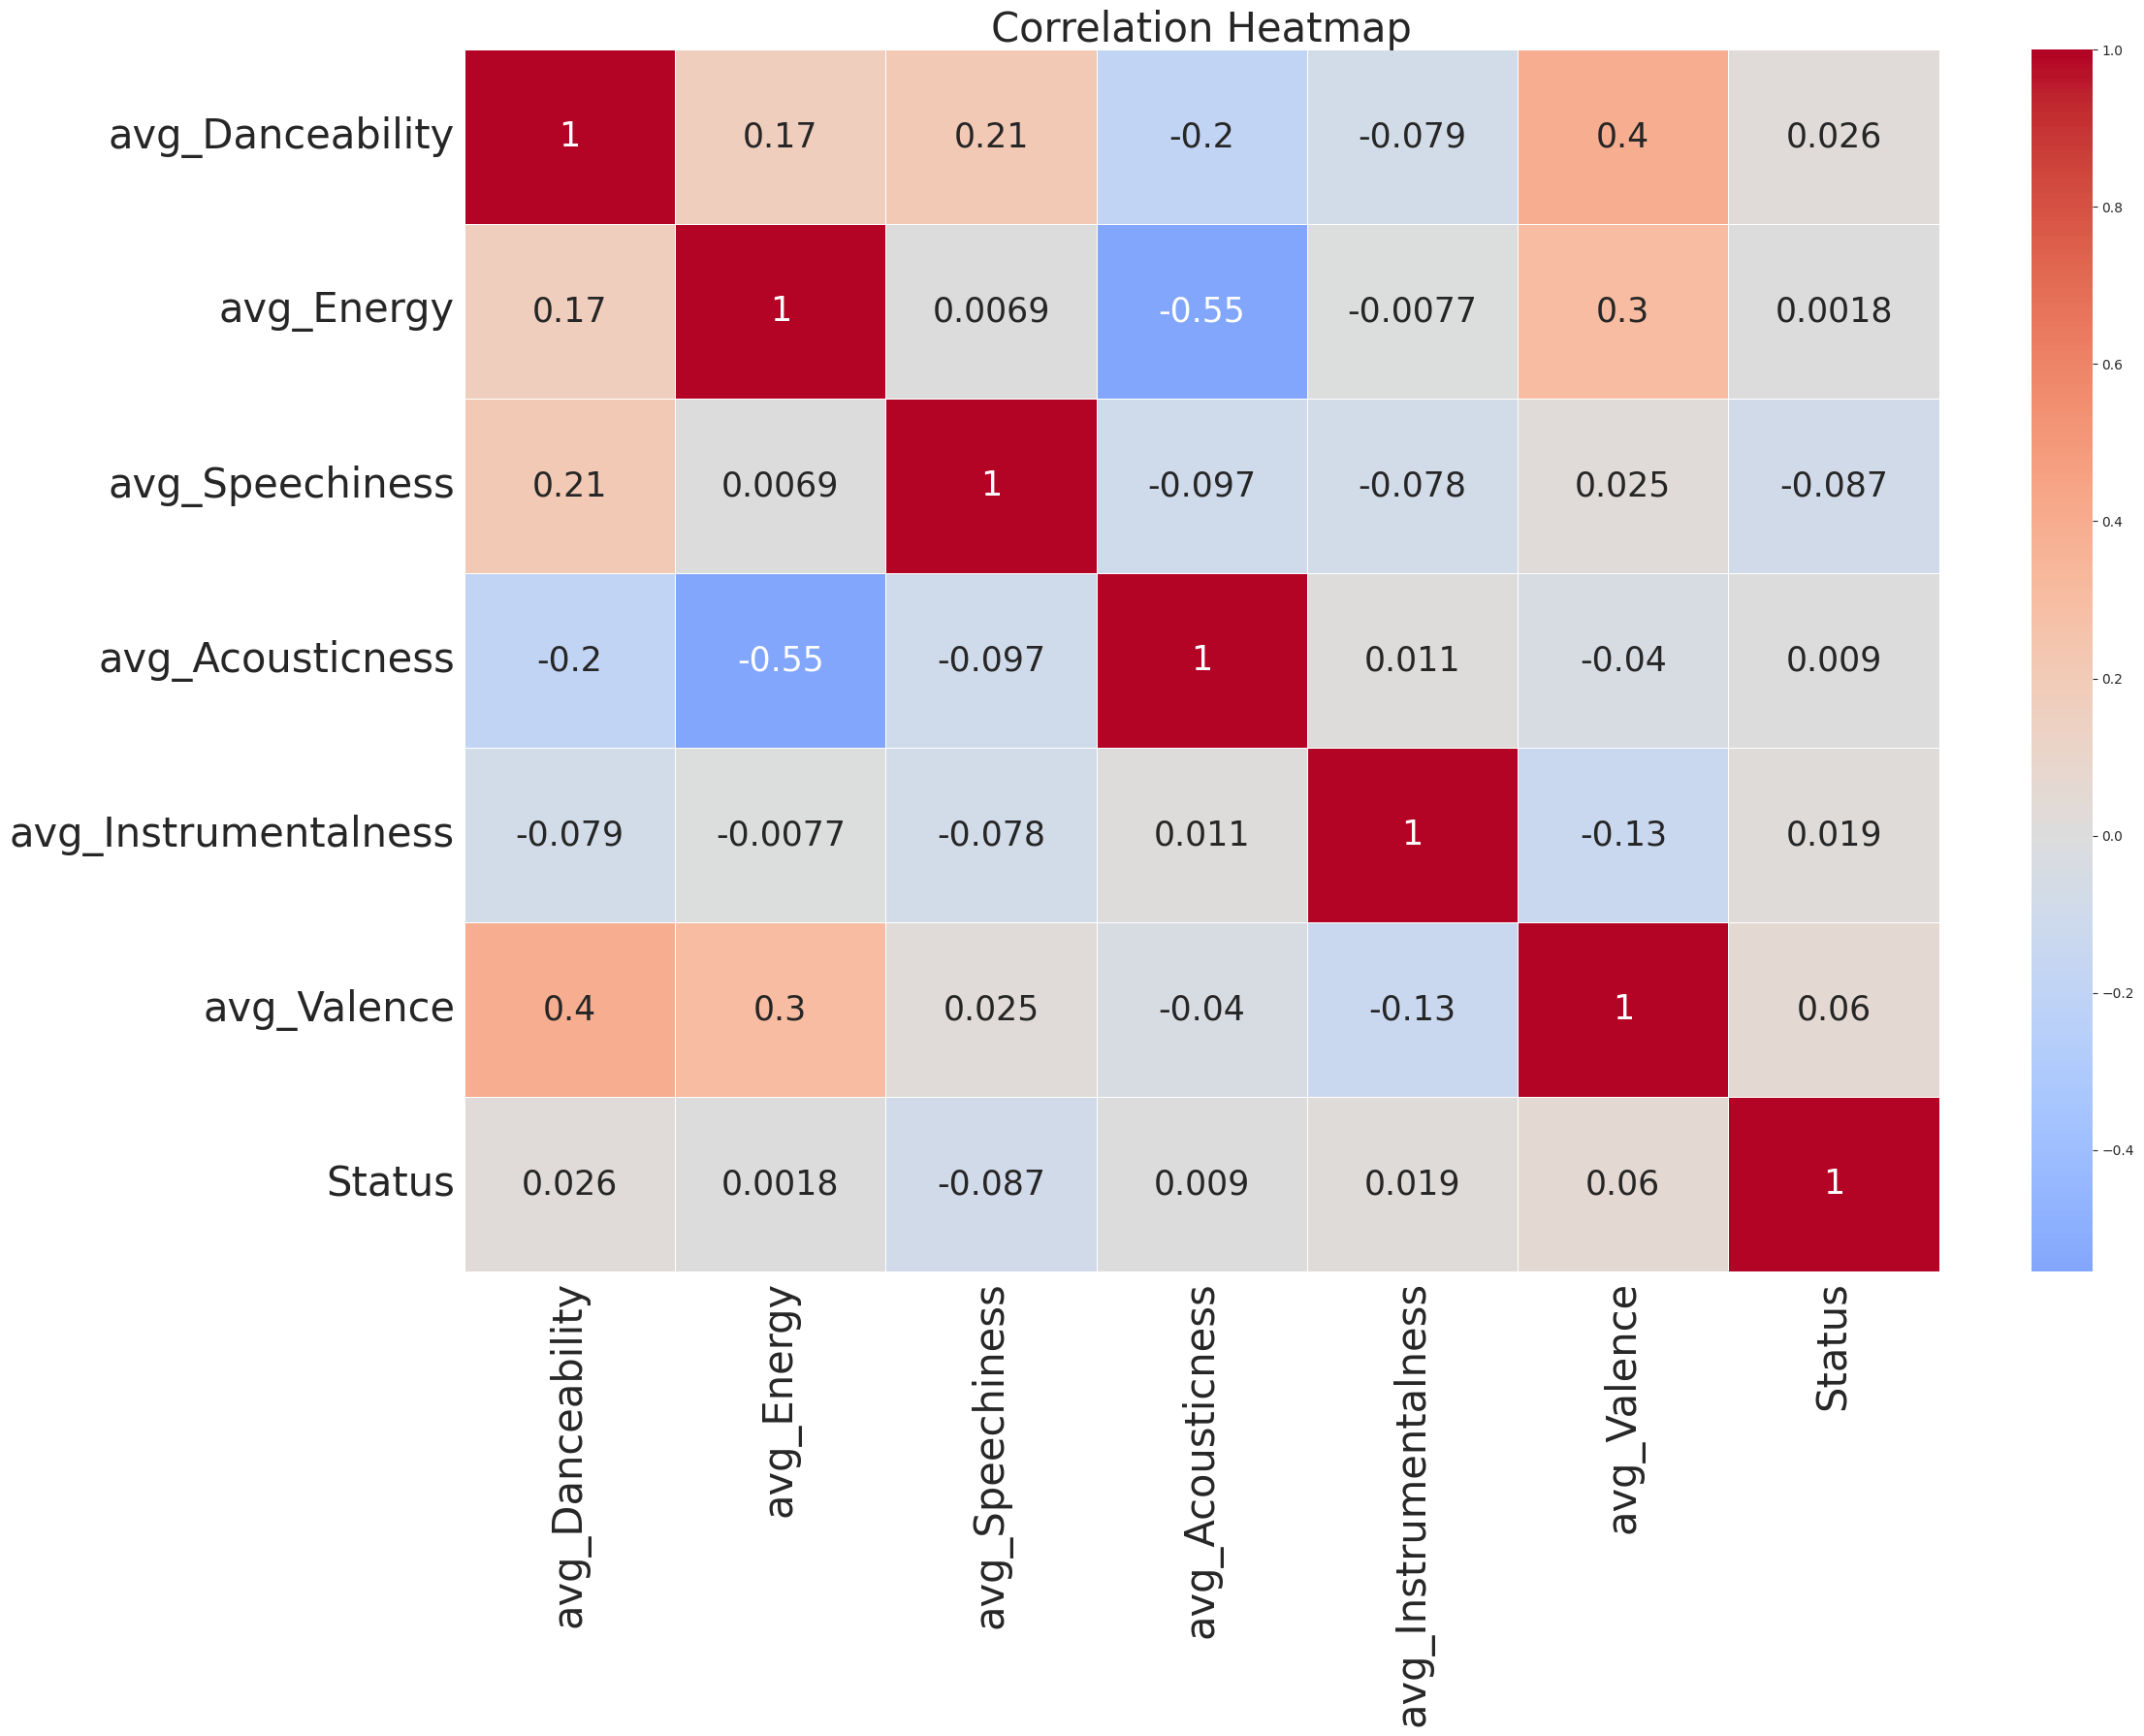

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_final.drop(columns=['Continent_Africa', 'Continent_Anglo-America','Continent_Asia', 'Continent_Europe',
                                           'Continent_Latin-America', 'Continent_Oceania','Continent_Unknown']).corr()

# Create a correlation heatmap
plt.figure(figsize=(24, 18))
ax=sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 25}, cmap="coolwarm", linewidths=0.5, center=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, verticalalignment='center')
ax.set_xticklabels(ax.get_yticklabels(), rotation=90)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.title("Correlation Heatmap", fontsize=30)
plt.tight_layout()
plt.savefig('Correlation Heatmap.png')
plt.show()

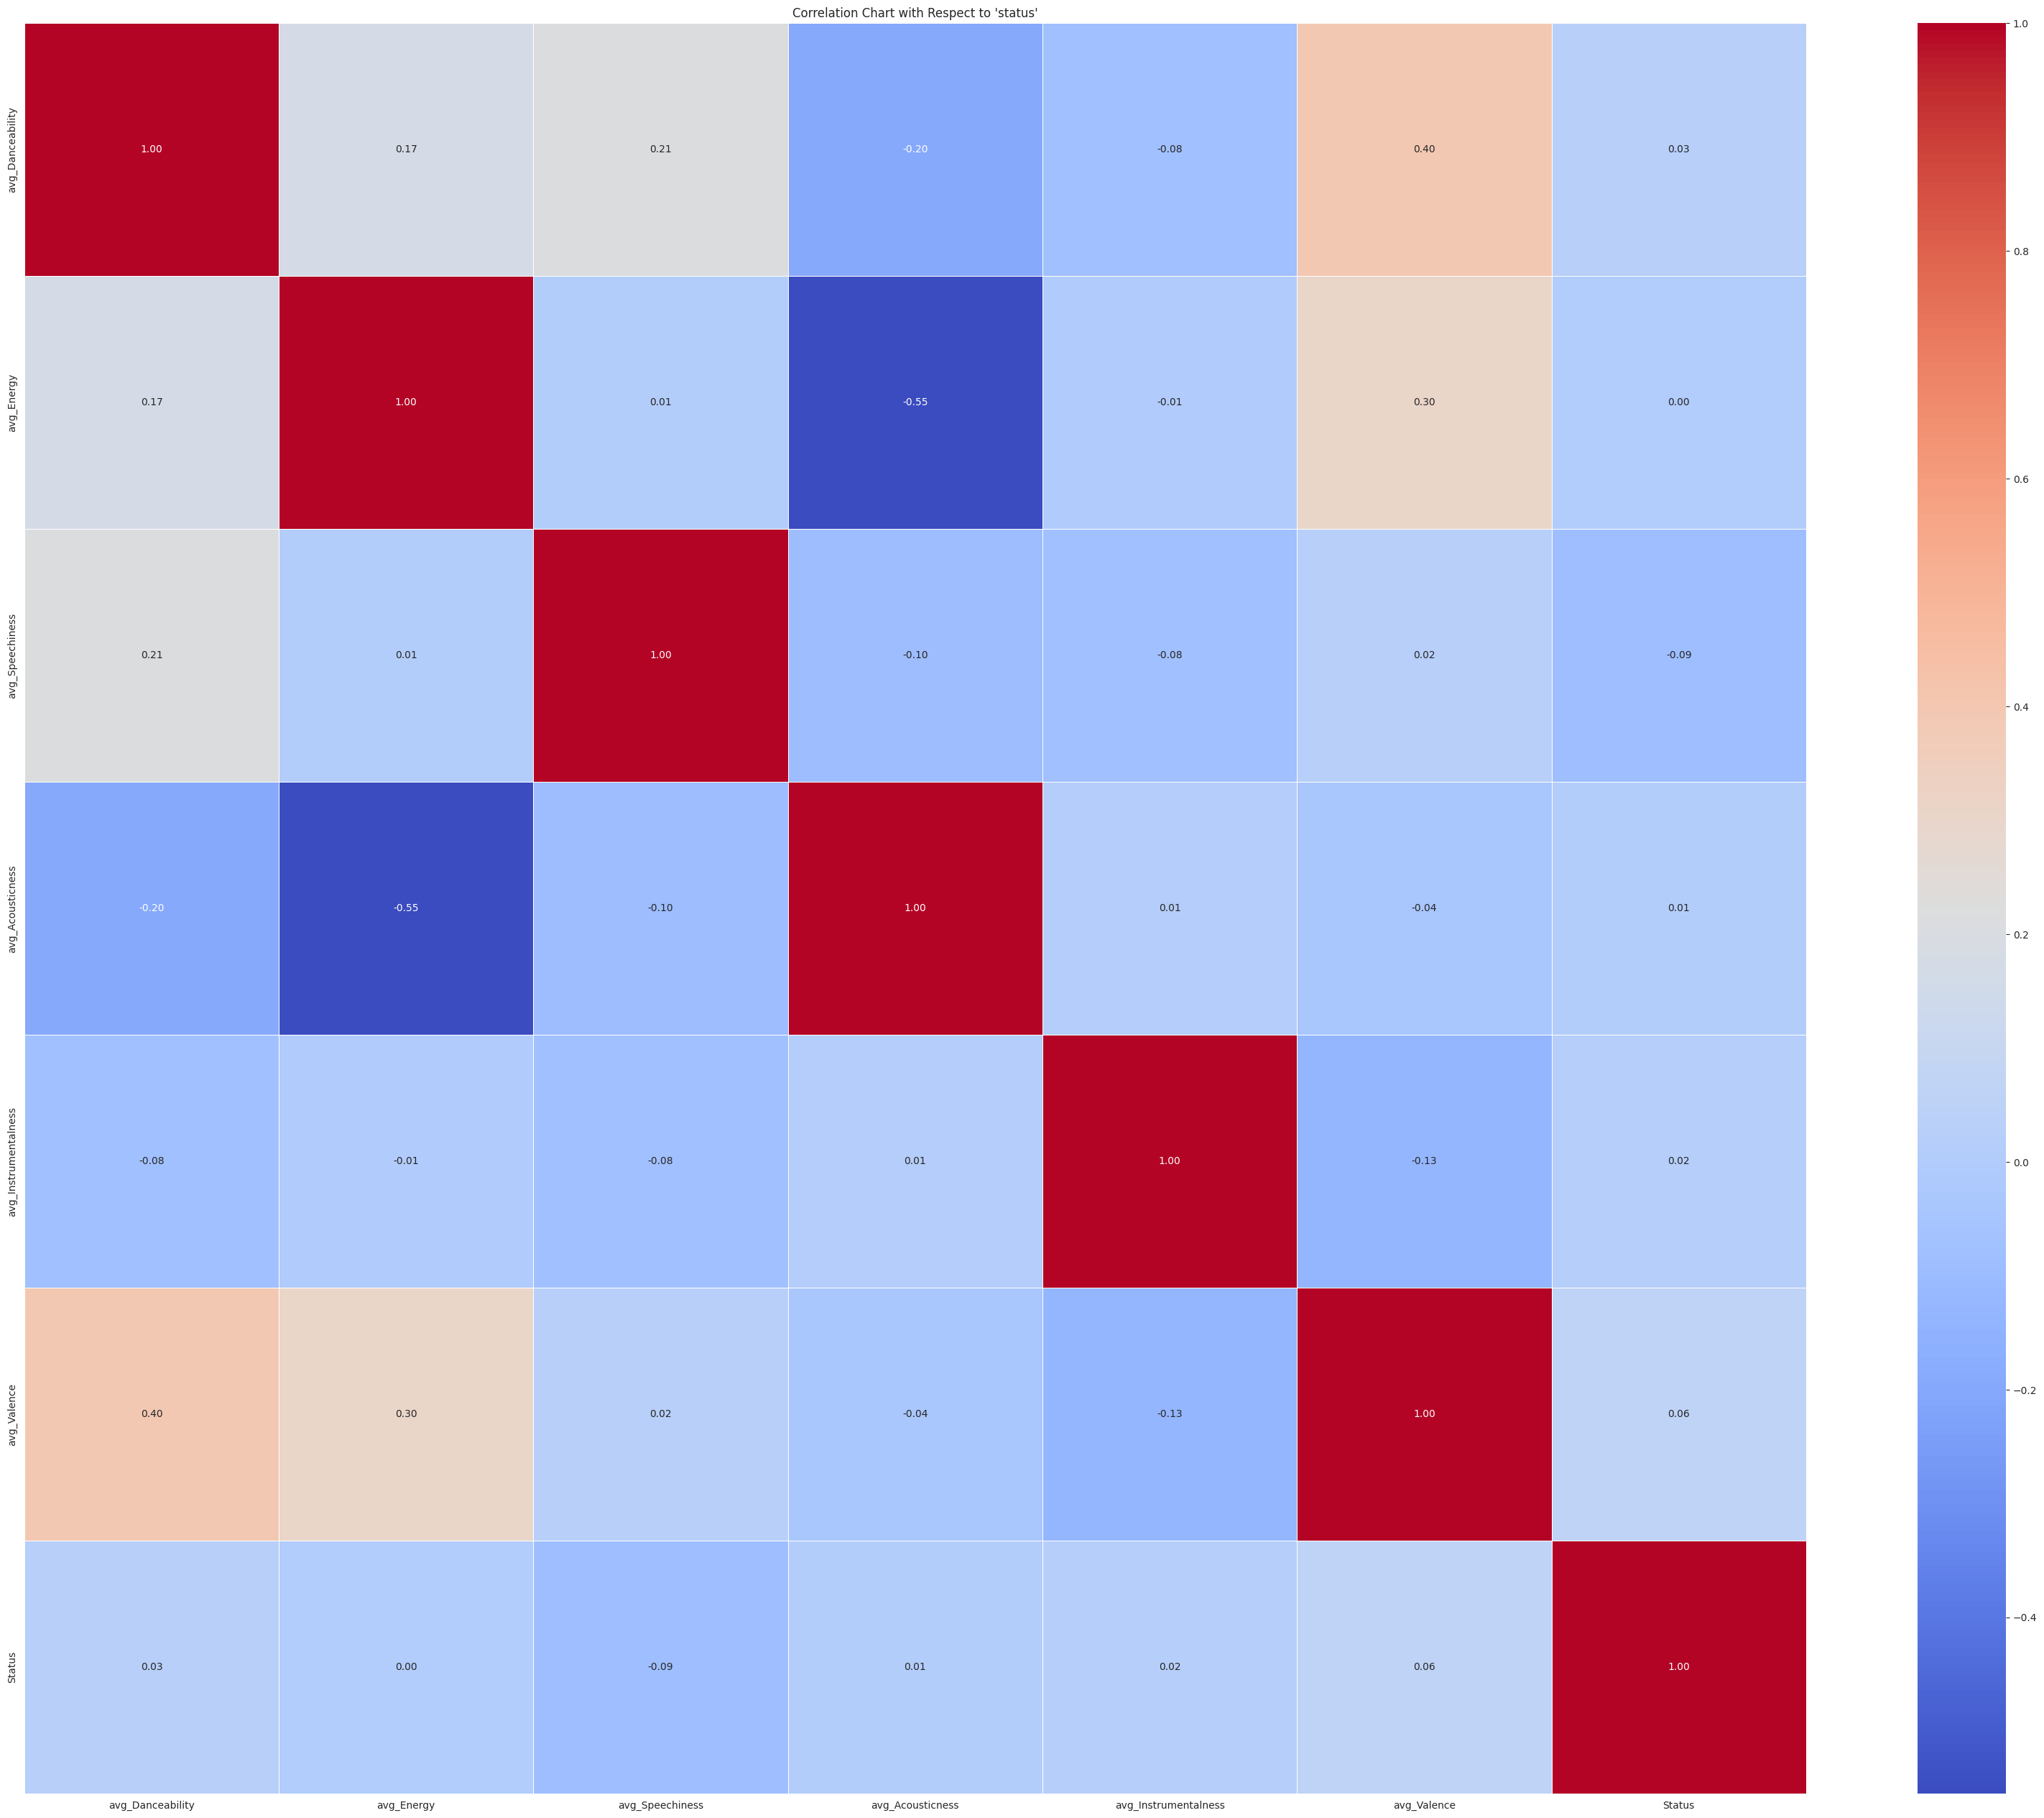

In [ ]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Chart with Respect to 'status'")
plt.show()

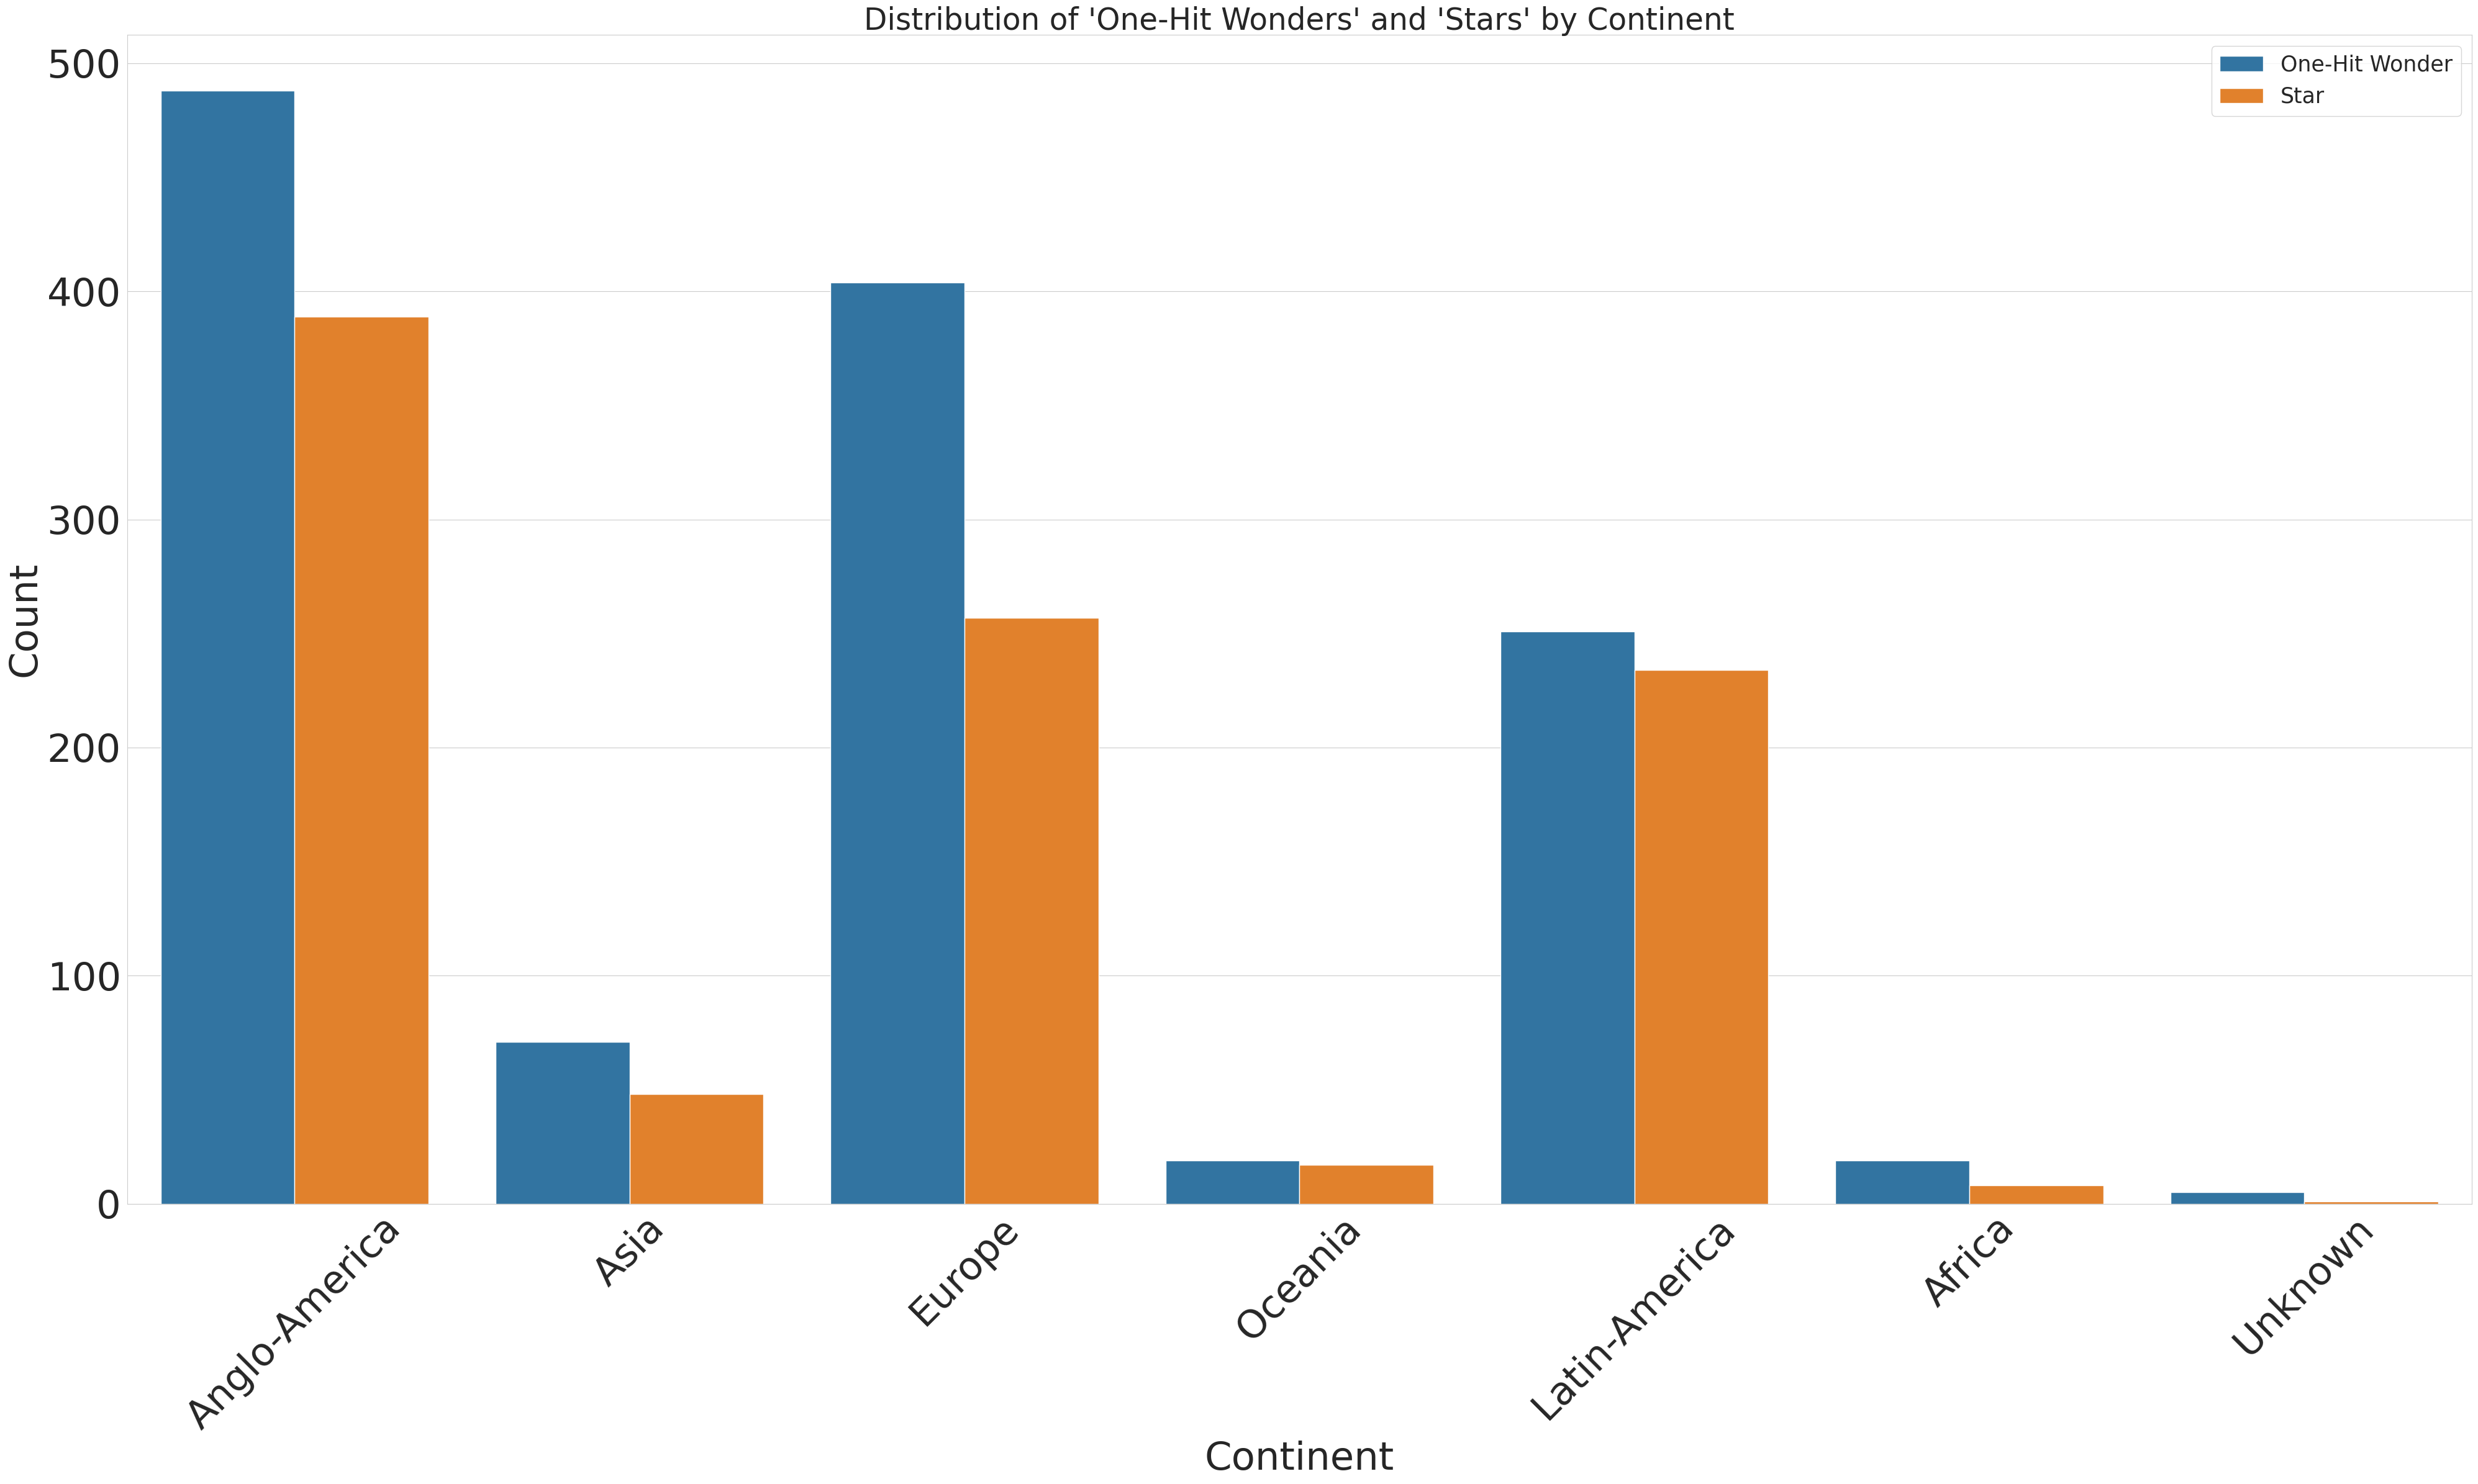

In [ ]:
plt.figure(figsize=(40, 24))
sns.countplot(x='Continent', hue='Status', data=df1)
plt.title("Distribution of 'One-Hit Wonders' and 'Stars' by Continent", fontsize=35)
plt.xlabel('Continent', fontsize=45)
plt.ylabel('Count', fontsize=45)
plt.xticks(rotation=45, fontsize=45)
plt.yticks(fontsize=45)
plt.legend(['One-Hit Wonder', 'Star'], fontsize=25)
plt.tight_layout()
plt.savefig('Plots_for_continent_Features.png')
plt.show()

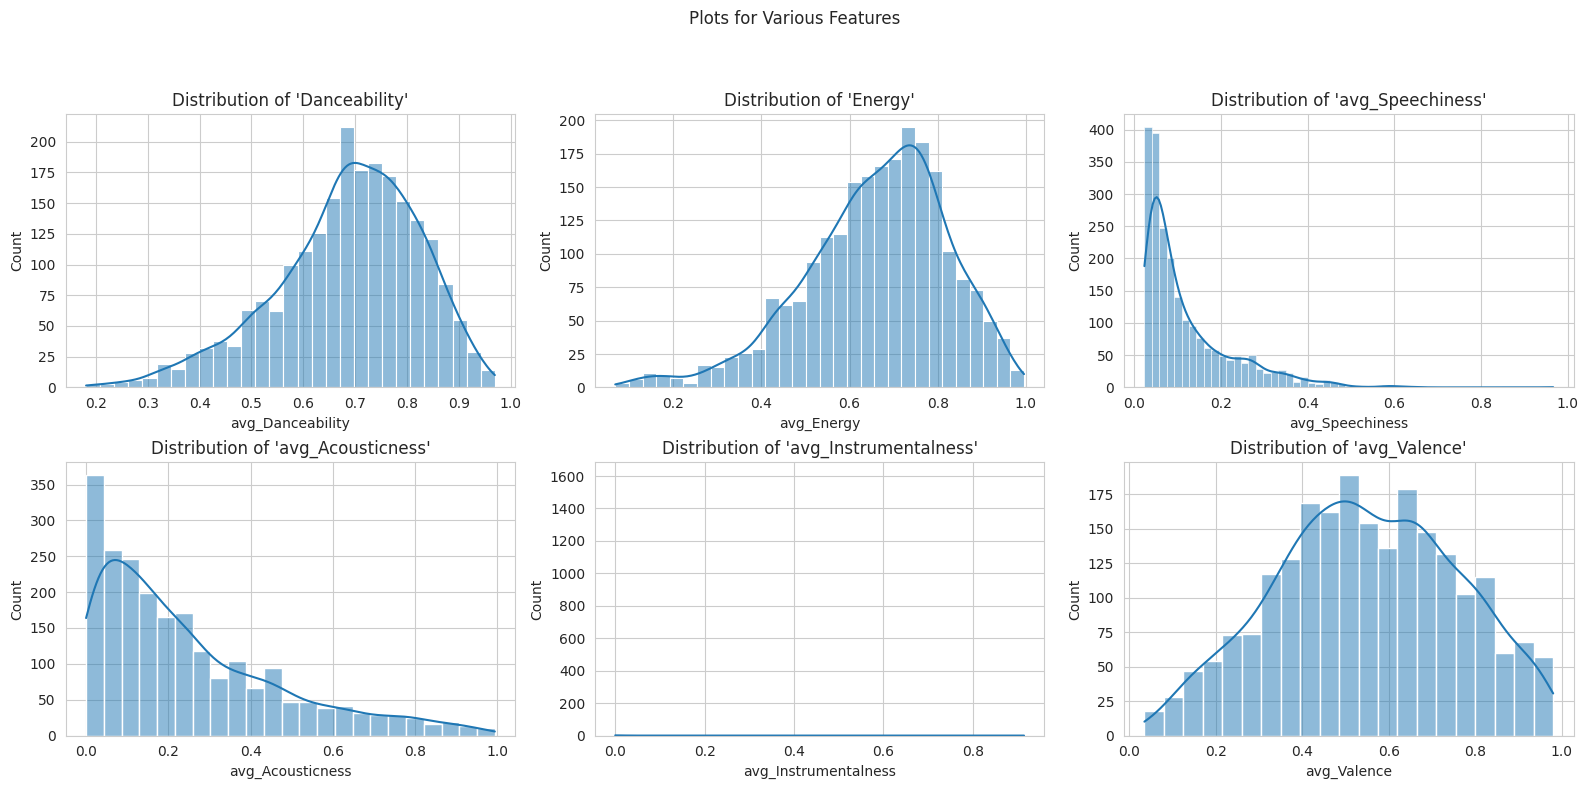

In [ ]:
# Create subplots for the remaining columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("Plots for Various Features")

sns.histplot(df_final, x='avg_Danceability', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of 'Danceability'")

sns.histplot(df_final, x='avg_Energy', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of 'Energy'")

sns.histplot(df_final, x='avg_Speechiness', kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Distribution of 'avg_Speechiness'")

sns.histplot(df_final, x='avg_Acousticness', kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of 'avg_Acousticness'")

sns.histplot(df_final, x='avg_Instrumentalness', kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of 'avg_Instrumentalness'")

sns.histplot(df_final, x='avg_Valence', kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Distribution of 'avg_Valence'")

# Remove empty subplot


plt.tight_layout()
plt.subplots_adjust(top=0.85)
fig.savefig('Plots for Various Features.png')
plt.show()

# Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
train_size = int(0.7 * len(df_final))
val_size = int(0.15 * len(df_final))
#df_final=df_final.sample(frac=1, random_state=42).reset_index(drop=True)
# Split the data into train, validation, and test sets

In [ ]:
train_size = int(0.7 * len(df_final))
val_size = int(0.15 * len(df_final))
df_final= df_final.sample(frac=1).reset_index(drop=True)
# Split the data into train, validation, and test sets
train_df = df_final.iloc[:train_size]
val_df = df_final.iloc[train_size:train_size + val_size]
test_df = df_final.iloc[train_size + val_size:]

from sklearn.preprocessing import StandardScaler

# Defining X and y for training data
X_train = train_df.drop(columns=["Status"])
y_train = train_df["Status"]

# Defining X and y for validation data
X_val = val_df.drop(columns=["Status"])
y_val = val_df["Status"]

# Defining X and y for test data
X_test = test_df.drop(columns=["Status"])
y_test = test_df["Status"]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data
X_val_scaled = scaler.transform(X_val)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


# num_entries and avg_duration should be removed as the model would overfit if not removed

# RandomForestClassifier

In [ ]:
# Define the features and target variable
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

# Create an undersampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X_train_scaled, y_train)



# Create and train a classification model (Random Forest in this example)
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_val)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.4501510574018127
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       182
           1       0.45      1.00      0.62       149

    accuracy                           0.45       331
   macro avg       0.23      0.50      0.31       331
weighted avg       0.20      0.45      0.28       331



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use

In [ ]:
# Create and train a classification model (Random Forest in this example)
from sklearn.metrics import f1_score
clf = RandomForestClassifier(criterion="gini",random_state=42)

# Train the classifier on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_val_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6586102719033232
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72       182
           1       0.67      0.48      0.56       149

    accuracy                           0.66       331
   macro avg       0.66      0.64      0.64       331
weighted avg       0.66      0.66      0.65       331



# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
model2 = LogisticRegression(random_state=42)
model2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.86      0.68       182
           1       0.54      0.21      0.30       149

    accuracy                           0.56       331
   macro avg       0.56      0.53      0.49       331
weighted avg       0.56      0.56      0.51       331



# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled training data
clf2.fit(X_train_scaled, y_train)

# Make predictions on the original test data
y_pred = clf2.predict(X_val_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5981873111782477
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65       182
           1       0.56      0.50      0.53       149

    accuracy                           0.60       331
   macro avg       0.59      0.59      0.59       331
weighted avg       0.59      0.60      0.59       331



# SVM classifier

In [ ]:
from sklearn.svm import SVC
# Create an SVM classifier
clf3 = SVC(random_state=42)

# Train the classifier on the resampled training data
clf3.fit(X_train_scaled, y_train)

# Make predictions on the original test data
y_pred = clf3.predict(X_val_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5377643504531722
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.77      0.65       182
           1       0.47      0.25      0.33       149

    accuracy                           0.54       331
   macro avg       0.52      0.51      0.49       331
weighted avg       0.52      0.54      0.50       331



# neural network model

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define a simple neural network model
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the resampled training data
model3.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the original test data
y_pred = model3.predict(X_val_scaled)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary labels

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Epoch 1/10
49/49 [==============================] - 2s 10ms/step - loss: 0.6820 - accuracy: 0.5676
Epoch 2/10
49/49 [==============================] - 1s 11ms/step - loss: 0.6684 - accuracy: 0.5740
Epoch 3/10
49/49 [==============================] - 1s 11ms/step - loss: 0.6602 - accuracy: 0.5869
Epoch 4/10
49/49 [==============================] - 0s 8ms/step - loss: 0.6546 - accuracy: 0.6096
Epoch 5/10
49/49 [==============================] - 1s 11ms/step - loss: 0.6453 - accuracy: 0.6115
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.6392 - accuracy: 0.6206
Epoch 7/10
49/49 [==============================] - 1s 12ms/step - loss: 0.6316 - accuracy: 0.6283
Epoch 8/10
49/49 [==============================] - 1s 12ms/step - loss: 0.6247 - accuracy: 0.6477
Epoch 9/10
49/49 [==============================] - 0s 8ms/step - loss: 0.6196 - accuracy: 0.6374
Epoch 10/10
11/11 [==============================] - 1s 6ms/step
Accuracy: 0.5317220543806647
Classification Re

# XGBoost classifier

In [ ]:
!pip install xgboost

In [ ]:

from xgboost import XGBClassifier

# Create an XGBoost classifier
clf4 = XGBClassifier(random_state=42)

# Train the classifier on the resampled training data
clf4.fit(X_train_scaled, y_train)

# Make predictions on the original test data
y_pred = clf4.predict(X_val_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6646525679758308
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       182
           1       0.65      0.54      0.59       149

    accuracy                           0.66       331
   macro avg       0.66      0.65      0.65       331
weighted avg       0.66      0.66      0.66       331



In [ ]:

from xgboost import XGBClassifier

# Create an XGBoost classifier
clf4 = XGBClassifier(random_state=42,colsample_bylevel=0.8 ,eta=0.2,max_depth=5, gamma=0.2)

# Train the classifier on the resampled training data
clf4.fit(X_train, y_train)

# Make predictions on the original test data
y_pred = clf4.predict(X_val)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6706948640483383
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.73       182
           1       0.67      0.52      0.59       149

    accuracy                           0.67       331
   macro avg       0.67      0.66      0.66       331
weighted avg       0.67      0.67      0.66       331



In [ ]:
# Make predictions on the original test data
y_pred = clf4.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6306306306306306
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.70       187
           1       0.60      0.47      0.53       146

    accuracy                           0.63       333
   macro avg       0.62      0.61      0.61       333
weighted avg       0.63      0.63      0.62       333



# KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
clf5 = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the resampled training data
clf5.fit(X_train, y_train)

# Make predictions on the original test data
y_pred = clf5.predict(X_val)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5770392749244713
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.81      0.68       182
           1       0.56      0.29      0.38       149

    accuracy                           0.58       331
   macro avg       0.57      0.55      0.53       331
weighted avg       0.57      0.58      0.54       331



# Gaussian Naive Bayes classifier

In [ ]:

from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf6 = GaussianNB()

# Train the classifier on the resampled training data
clf6.fit(X_train, y_train)

# Make predictions on the original test data
y_pred = clf6.predict(X_val)

# Evaluate the classifier
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5468277945619335
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.54       182
           1       0.50      0.62      0.55       149

    accuracy                           0.55       331
   macro avg       0.55      0.55      0.55       331
weighted avg       0.56      0.55      0.55       331



In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [ 50, 100, 200],
    #'max_depth': [40, 50, 52, 55],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print(best_params)

#'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 55}  0.7009063444108762

In [ ]:
best_rf = random_search.best_estimator_  # or random_search.best_estimator_
y_pred = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

In [ ]:
classification_rep = classification_report(y_val, y_pred)

In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


In [ ]:
y_pred=best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01,0.001, 0.1, 0.2],
    'max_depth': [3, 4, 5,6],
    'min_child_weight': [1, 5, 10,15],
    'subsample': [ 0.6,0.8, 0.9, 1.0],
    'colsample_bytree': [0.6,0.8, 0.9, 1.0],
}

In [ ]:
random_search = RandomizedSearchCV(estimator=clf4, param_distributions=param_grid, n_iter=20, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)
best_params = random_search.best_params_

In [ ]:
best_xgb = random_search.best_estimator_  # or random_search.best_estimator_
y_pred = best_xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

In [ ]:
classification_rep = classification_report(y_val, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.649546827794562
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       182
           1       0.65      0.49      0.56       149

    accuracy                           0.65       331
   macro avg       0.65      0.64      0.63       331
weighted avg       0.65      0.65      0.64       331



In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel used in the algorithm
}

grid_search = GridSearchCV(
    estimator=clf3,
    param_grid=param_grid,
    cv=2,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,  # Controls output: higher number, more messages
    n_jobs=-1  # Number of jobs to run in parallel (-1 means using all processors)
)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
Best parameters: {'C': 1000, 'kernel': 'poly'}
Best score: 0.5746637985498961


In [ ]:
best_svm = grid_search.best_estimator_  # or random_search.best_estimator_
y_pred = best_xgb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

classification_rep = classification_report(y_val, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.649546827794562
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       182
           1       0.65      0.49      0.56       149

    accuracy                           0.65       331
   macro avg       0.65      0.64      0.63       331
weighted avg       0.65      0.65      0.64       331

